**Hisse Senetlerinin Sektörel Benzerlik Analizi ve Sınıflandırma Modeli Geliştirilmesi**

Elif Yılmaz


**1. Proje Genel Bakış**

---
Bu proje, hisse senetlerinin sektörler arasındaki benzerliklerini analiz etmeye ve sınıflandırma modelleri kullanarak hangi sektörlere ait olduklarını belirlemeye odaklanmaktadır. Amaç, zaman serisi davranışlarını analiz ederek, bir hisse senedinin hangi sektöre daha yakın olduğunu tespit etmek ve bu bilgiyi yatırım stratejilerinde kullanmaktır. Proje, hisse senedi ve sektör verileri üzerinde tsfresh gibi gelişmiş özellik mühendisliği araçları kullanarak anlamlı özellikler çıkarılmasını içerir.

**2. Veri Toplama**

---


Veri Kaynakları: Veri toplama aşamasında yfinance, investpy, quandl gibi kütüphaneler kullanılmıştır. Özellikle 1 Ocak 2005'ten itibaren hisse senedi getirileri ve sektör verileri toplanmıştır.

Web Scraping: Sektörler ve hisse senetleri listesi için web scraping yöntemleri kullanılmıştır. Bu, farklı sektörlere ait hisse senedi verilerinin daha verimli bir şekilde toplanmasını sağlamıştır.

Örnek Veri: Sektörler (örneğin Finans, Sağlık, Teknoloji) ve hisse senedi sembollerinin listesi CSV dosyalarına kaydedilmiş ve daha sonra sınıflandırma amacıyla kullanılmıştır.

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Sektör isimlerini çekme fonksiyonu
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Endüstri isimlerini çekme fonksiyonu
def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Belirtilen sektör için hisse senedi listesini çekme fonksiyonu
def fetch_data(sector):
    url = f"https://stockanalysis.com/stocks/sector/{sector}/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        df.drop(columns=['No.'], errors='ignore', inplace=True)  # 'No.' sütunu varsa kaldır
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# İlgili sektörleri belirleme
sectors = ['financials', 'healthcare', 'technology']

# Veri klasörünü oluştur
import os
os.makedirs("data/stock_sectors", exist_ok=True)

# Her sektör için veri çekme ve CSV'ye kaydetme
for sector in sectors:
    df = fetch_data(sector)
    if df is not None:
        df.to_csv(f"data/stock_sectors/{sector}.csv", index=False)
        print(f"Data saved for {sector}")
    else:
        print(f"Failed to retrieve data for {sector}")


Data saved for financials
Data saved for healthcare
Data saved for technology



Bu kod, belirli sektörlerdeki hisse senedi verilerini toplamak için kullanılıyor. Kod, sektörel bazda verileri çekip, her sektör için ayrı bir CSV dosyasına kaydediyor. Adımlar şu şekilde işler:

**1. Sektör İsimlerini Çekme**

`fetch_sectors_names()` fonksiyonu, belirtilen URL'den sektör isimlerini çeker ve bu verileri bir **DataFrame** olarak döndürür. Bu fonksiyon, sektörlerin isimlerini ve özelliklerini elde etmek için kullanılır.

**2. Endüstri İsimlerini Çekme**

`fetch_industry_names()` fonksiyonu, farklı endüstrileri listeler ve bu verileri yine bir **DataFrame** olarak döndürür. Bu işlem, sektörel bazda daha detaylı analizler yapabilmek için gereklidir.

**3. Hisse Senedi Verilerini Çekme**

`fetch_data(sector)` fonksiyonu, belirli bir sektöre ait hisse senedi listesini çeker. Çekilen veriler, ilgili sektöre ait tüm hisse senetlerinin bilgilerini içerir ve bu veriyi bir **DataFrame** olarak döndürür.

**4. Veriyi Kaydetme**

Kod, belirli sektörler (örneğin finans, sağlık, teknoloji) için verileri çeker ve her sektör için veriyi bir CSV dosyasına kaydeder. Bu sayede, her sektör için veriler kolayca kullanılabilir hale gelir.


In [ ]:
import pandas as pd

# Verilerin yüklendiği dosya yolları
file_paths = [
    '/content/data/stock_sectors/financials.csv',
    '/content/data/stock_sectors/healthcare.csv',
    '/content/data/stock_sectors/financials.csv'
]

# Verileri oku
technology_df = pd.read_csv(file_paths[0])
healthcare_df = pd.read_csv(file_paths[1])
financials_df = pd.read_csv(file_paths[2])

# '-' olan hücreleri NaN ile değiştir
technology_df.replace("-", pd.NA, inplace=True)
healthcare_df.replace("-", pd.NA, inplace=True)
financials_df.replace("-", pd.NA, inplace=True)

# NaN değerlerin sayısını kontrol et
nan_technology = technology_df.isna().sum()
nan_healthcare = healthcare_df.isna().sum()
nan_financials = financials_df.isna().sum()

# Verilerin önceki bilgilerini yazdır
print("Veri Seti Bilgileri (Önce):")
print("\nTechnology Sector Verisi (Önce):")
technology_df.info()
print("\nHealthcare Sector Verisi (Önce):")
healthcare_df.info()
print("\nFinancial Sector Verisi (Önce):")
financials_df.info()

# NaN içeren satırları sil
technology_df_cleaned = technology_df.dropna()
healthcare_df_cleaned = healthcare_df.dropna()
financials_df_cleaned = financials_df.dropna()

# Temizlenmiş verisetlerini kaydet
technology_df_cleaned.to_csv('/content/data/stock_sectors/technology_cleaned.csv', index=False)
healthcare_df_cleaned.to_csv('/content/data/stock_sectors/healthcare_cleaned.csv', index=False)
financials_df_cleaned.to_csv('/content/data/stock_sectors/financials_cleaned.csv', index=False)

# NaN değerlerin sayısını yazdır
print("\nNaN Değer Sayıları:")
print("\nTechnology Sector Verisi:")
print(nan_technology)
print("\nHealthcare Sector Verisi:")
print(nan_healthcare)
print("\nFinancial Sector Verisi:")
print(nan_financials)

# Verilerin temizlendikten sonraki bilgilerini yazdır
print("\nVeri Seti Bilgileri (Temizlendikten Sonra):")
print("\nTechnology Sector Verisi (Temizlendikten Sonra):")
technology_df_cleaned.info()
print("\nHealthcare Sector Verisi (Temizlendikten Sonra):")
healthcare_df_cleaned.info()
print("\nFinancial Sector Verisi (Temizlendikten Sonra):")
financials_df_cleaned.info()


Veri Seti Bilgileri (Önce):

Technology Sector Verisi (Önce):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        881 non-null    object
 1   Company Name  881 non-null    object
 2   Market Cap    881 non-null    object
 3   % Change      831 non-null    object
 4   Volume        863 non-null    object
 5   Revenue       759 non-null    object
dtypes: object(6)
memory usage: 41.4+ KB

Healthcare Sector Verisi (Önce):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        1163 non-null   object
 1   Company Name  1163 non-null   object
 2   Market Cap    1163 non-null   object
 3   % Change      1131 non-null   object
 4   Volume        1160 non-null   object
 5   Revenue       848 

Bu adımda, çekilen sektör verileri üzerinde eksik veriler (gelen "-" değerleri) tespit edilmiştir ve bu değerler **NaN (Not a Number)** ile değiştirilmiştir. Ardından, her bir sektördeki NaN değerlerin sayısı kontrol edilmiştir.

Eksik veriler: Her bir sektördeki eksik veriler, dropna() fonksiyonu ile temizlenmiş ve NaN içeren satırlar veri setlerinden çıkarılmıştır.

Veri Seti Bilgileri: Temizlenmeden önce ve sonra her bir sektörün veri seti bilgileri yazdırılarak, veri setindeki sütun sayısı ve eksik veri durumu kontrol edilmiştir.
Veriler temizlendikten sonra, her bir sektör için güncellenmiş veri setleri yeni dosyalar olarak kaydedilmiştir.

In [ ]:
import yfinance as yf
import pandas as pd

# Veriyi içeren dosyayı yükleyelim
file_path = '/content/data/stock_sectors/financials_cleaned.csv'  # Dosyanızın yolu burada belirtilmiştir
df = pd.read_csv(file_path)

# Sembol listesi
tickers = df['Symbol'].unique()

# Veriyi çekme (günlük kapanış verileri)
data = yf.download(tickers.tolist(), start='2005-01-01')['Close']

# Aylık veriye dönüştürme (günlük veriyi aylık periyoda indirgeme)
monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme

# Aylık getiri hesaplama
monthly_returns = monthly_data.pct_change()  # Aylık getiri

# Eksik değerleri dolduruyoruz
monthly_returns.fillna(monthly_returns.mean(), inplace=True)

# Yeni veriyi kaydetme
output_path = 'financials_close_monthly.csv'  # Yeni dosya adı
monthly_returns.to_csv(output_path)

print(f"Yeni verisetiniz {output_path} olarak kaydedildi.")


[*********************100%***********************]  750 of 750 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['BRK.B', 'CRD.A', 'CRD.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-4-f5aedb2717e6>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme
<ipython-input-4-f5aedb2717e6>:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = monthly_data.pct_change()  # Aylık getiri


Yeni verisetiniz financials_close_monthly.csv olarak kaydedildi.


Bu adımda, **finans sektörü** için sembol listesi kullanılarak **2005 yılına kadar olan günlük kapanış fiyatları** yfinance kütüphanesi ile çekilmiştir. Elde edilen günlük veriler, aylık periyoda dönüştürülmüştür. Bunun için:

1. **Aylık Veriye Dönüştürme**: Günlük veriler, `resample('M')` fonksiyonu kullanılarak aylık verilere dönüştürülmüştür.
2. **Aylık Getiri Hesaplama**: Aylık veriler üzerinden, her ayın kapanış fiyatı ile bir önceki aya göre değişim oranı hesaplanarak **aylık getiri** elde edilmiştir.
3. **Eksik Değerler**: Aylık getirilerdeki eksik değerler, veri setinin ortalamasıyla doldurulmuştur.
4. **Yeni Veri Kaydetme**: Temizlenen ve işlenen aylık getiri verisi, yeni bir CSV dosyasına kaydedilmiştir.

Bu işlem, finans sektörüne ait hisse senetlerinin aylık performans verilerini analiz etmek için kullanıma hazır hale getirmiştir.

Bu işlem, **sağlık** ve **teknoloji** sektörlerine ait semboller için de aynı şekilde gerçekleştirilmiştir.

In [ ]:
import yfinance as yf
import pandas as pd

# Veriyi içeren dosyayı yükleyelim
file_path = '/content/data/stock_sectors/healthcare_cleaned.csv'  # Dosyanızın yolu burada belirtilmiştir
df = pd.read_csv(file_path)

# Sembol listesi
tickers = df['Symbol'].unique()

# Veriyi çekme (günlük kapanış verileri)
data = yf.download(tickers.tolist(), start='2005-01-01')['Close']

# Aylık veriye dönüştürme (günlük veriyi aylık periyoda indirgeme)
monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme

# Aylık getiri hesaplama
monthly_returns = monthly_data.pct_change()  # Aylık getiri

# Eksik değerleri dolduruyoruz
monthly_returns.fillna(monthly_returns.mean(), inplace=True)

# Yeni veriyi kaydetme
output_path = 'healthcare_close_monthly.csv'  # Yeni dosya adı
monthly_returns.to_csv(output_path)

print(f"Yeni verisetiniz {output_path} olarak kaydedildi.")


[*********************100%***********************]  818 of 820 completed
ERROR:yfinance:
124 Failed downloads:
ERROR:yfinance:['IMCC', 'INBX', 'HAE', 'LMAT', 'DHR', 'LPCN', 'ARDX', 'BACK', 'AMRN', 'AVAH', 'INO', 'MRUS', 'NGNE', 'MDAI', 'USPH', 'WRBY', 'QIPT', 'CBUS', 'OVID', 'MMSI', 'SPRC', 'NEPH', 'PTGX', 'FDMT', 'LYEL', 'GKOS', 'SUPN', 'FONR', 'DERM', 'SEER', 'ABSI', 'SY', 'MEDP', 'RNAC', 'LNSR', 'GUTS', 'IPSC', 'OFIX', 'MCRB', 'RADX', 'LUNG', 'CANF', 'AMN', 'NHC', 'ARQT', 'SONN', 'GELS', 'HCM', 'ASMB', 'LAB', 'APRE', 'ICLR', 'ZLAB', 'PLUR', 'CCM', 'SABS', 'IMCR', 'ALVO', 'CRNX', 'URGN', 'EW', 'DVAX', 'AQST', 'TALK', 'STXS', 'TAK', 'NYXH', 'MNKD', 'BLRX', 'RLAY', 'BMY', 'BLFS', 'RPID', 'SRDX', 'GEHC', 'IBRX', 'COLL', 'PAHC', 'NRIX', 'PGEN', 'ATAI', 'PRME', 'MCK', 'QSI', 'BWAY', 'GBIO', 'CKPT', 'KZIA', 'FMS', 'PDCO', 'BSGM', 'BCYC', 'MRNS', 'CDXS', 'AADI', 'SPRO', 'ALT', 'PRPH', 'ANGO', 'OTRK', 'CJJD', 'SYBX', 'AVDL', 'TCRX', 'NVST', 'OM', 'PYXS', 'FOLD', 'SCLX', 'EVAX', 'ELMD', 'HRTX

Yeni verisetiniz healthcare_close_monthly.csv olarak kaydedildi.


In [ ]:
import yfinance as yf
import pandas as pd

# Veriyi içeren dosyayı yükleyelim
file_path = '/content/data/stock_sectors/technology_cleaned.csv'  # Dosyanızın yolu burada belirtilmiştir
df = pd.read_csv(file_path)

# Sembol listesi
tickers = df['Symbol'].unique()

# Veriyi çekme (günlük kapanış verileri)
data = yf.download(tickers.tolist(), start='2005-01-01')['Close']

# Aylık veriye dönüştürme (günlük veriyi aylık periyoda indirgeme)
monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme

# Aylık getiri hesaplama
monthly_returns = monthly_data.pct_change()  # Aylık getiri

# Eksik değerleri dolduruyoruz
monthly_returns.fillna(monthly_returns.mean(), inplace=True)

# Yeni veriyi kaydetme
output_path = 'technology_close_monthly.csv'  # Yeni dosya adı
monthly_returns.to_csv(output_path)

print(f"Yeni verisetiniz {output_path} olarak kaydedildi.")


[*********************100%***********************]  750 of 750 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['BRK.B', 'CRD.A', 'CRD.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-3-57433c196b97>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme
<ipython-input-3-57433c196b97>:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = monthly_data.pct_change()  # Aylık getiri


Yeni verisetiniz technology_close_monthly.csv olarak kaydedildi.


In [ ]:
import pandas as pd

# Dosya yolları
file_paths = [
    '/content/financials_close_monthly.csv',
    '/content/technology_close_monthly.csv',
    '/content/healthcare_close_monthly.csv'
]

# Her dosya için işlem yapma
for file_path in file_paths:
    print(f"\nİşlem Yapılan Dosya: {file_path}")

    # CSV dosyasını yükleyin
    data = pd.read_csv(file_path)

    # Veri hakkında genel bilgi yazdırma
    print("\nVeri Bilgisi:")
    print(data.info())

    # Toplam satır ve sütun sayısını yazdırma
    total_rows, total_columns = data.shape
    print(f"\nToplam Satır Sayısı: {total_rows}")
    print(f"Toplam Sütun Sayısı: {total_columns}")

    # Boş değerlerin sayısını kontrol etme
    missing_values = data.isnull().sum()

    # En çok boş değeri olan sütunları yazdırma
    print("\nBoş Değerlerin Sayısı:")
    missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
    print(missing_values_sorted)

    # Kaç satırda boş değer olduğunu bulma
    rows_with_missing_values = data.isnull().any(axis=1).sum()
    columns_with_missing_values = missing_values[missing_values > 0].count()

    print(f"\nBoş Değer İçeren Satır Sayısı: {rows_with_missing_values}")
    print(f"Boş Değer İçeren Sütun Sayısı: {columns_with_missing_values}")



İşlem Yapılan Dosya: /content/financials_close_monthly.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 751 entries, Date to ZION
dtypes: float64(750), object(1)
memory usage: 1.4+ MB
None

Toplam Satır Sayısı: 242
Toplam Sütun Sayısı: 751

Boş Değerlerin Sayısı:
BRK.B    242
CRD.A    242
CRD.B    242
PLUT     242
dtype: int64

Boş Değer İçeren Satır Sayısı: 242
Boş Değer İçeren Sütun Sayısı: 4

İşlem Yapılan Dosya: /content/technology_close_monthly.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 751 entries, Date to ZION
dtypes: float64(750), object(1)
memory usage: 1.4+ MB
None

Toplam Satır Sayısı: 242
Toplam Sütun Sayısı: 751

Boş Değerlerin Sayısı:
BRK.B    242
CRD.A    242
CRD.B    242
PLUT     242
dtype: int64

Boş Değer İçeren Satır Sayısı: 242
Boş Değer İçeren Sütun Sayısı: 4

İşlem Yapılan Dosya: /content/healthcare_close_monthly.csv

Veri Bilgisi:
<class 'pandas.core.frame

In [ ]:
import pandas as pd

# Dosya yolları
file_paths = [
    '/content/financials_close_monthly.csv',
    '/content/technology_close_monthly.csv',
    '/content/healthcare_close_monthly.csv'
]

# Her dosya için işlem yapma
for file_path in file_paths:
    print(f"\nİşlem Yapılan Dosya: {file_path}")

    # CSV dosyasını yükleyin
    data = pd.read_csv(file_path)

    # Boş sütunları tespit etme ve silme
    columns_with_missing_values = data.columns[data.isnull().all()]
    print(f"Boş Sütunlar: {columns_with_missing_values.tolist()}")

    # Boş sütunları silme
    data_cleaned = data.drop(columns=columns_with_missing_values)

    # Temizlenmiş veriyi yeniden kaydetme
    cleaned_file_path = file_path.replace('.csv', '_cleaned.csv')
    data_cleaned.to_csv(cleaned_file_path, index=False)

    print(f"Temizlenmiş dosya kaydedildi: {cleaned_file_path}")



İşlem Yapılan Dosya: /content/financials_close_monthly.csv
Boş Sütunlar: ['BRK.B', 'CRD.A', 'CRD.B', 'PLUT']
Temizlenmiş dosya kaydedildi: /content/financials_close_monthly_cleaned.csv

İşlem Yapılan Dosya: /content/technology_close_monthly.csv
Boş Sütunlar: ['BRK.B', 'CRD.A', 'CRD.B', 'PLUT']
Temizlenmiş dosya kaydedildi: /content/technology_close_monthly_cleaned.csv

İşlem Yapılan Dosya: /content/healthcare_close_monthly.csv
Boş Sütunlar: ['AADI', 'ABSI', 'ABVC', 'ALT', 'ALVO', 'AMN', 'AMRN', 'ANGO', 'APRE', 'AQST', 'ARDX', 'ARQT', 'ASMB', 'ATAI', 'AVAH', 'AVDL', 'BACK', 'BCYC', 'BIIB', 'BLFS', 'BLRX', 'BMY', 'BNGO', 'BSGM', 'BWAY', 'CANF', 'CBUS', 'CCM', 'CDXS', 'CJJD', 'CKPT', 'COLL', 'CRNX', 'CYCC', 'DERM', 'DHR', 'DVAX', 'ELMD', 'ENZ', 'EVAX', 'EW', 'FDMT', 'FMS', 'FOLD', 'FONR', 'GBIO', 'GEHC', 'GELS', 'GKOS', 'GUTS', 'HAE', 'HCM', 'HRTX', 'IBIO', 'IBRX', 'ICLR', 'IFRX', 'IMCC', 'IMCR', 'IMTX', 'INBX', 'INO', 'IPSC', 'KRYS', 'KZIA', 'LAB', 'LMAT', 'LNSR', 'LPCN', 'LUNG', 'LYEL'

In [ ]:
import pandas as pd

# Temizlenmiş dosya yolları
cleaned_file_paths = [
    '/content/financials_close_monthly_cleaned.csv',
    '/content/technology_close_monthly_cleaned.csv',
    '/content/healthcare_close_monthly_cleaned.csv'
]

# Her dosya için info() bilgilerini yazdırma
for cleaned_file_path in cleaned_file_paths:
    print(f"\nİşlem Yapılan Temizlenmiş Dosya: {cleaned_file_path}")

    # Temizlenmiş CSV dosyasını yükleyin
    data_cleaned = pd.read_csv(cleaned_file_path)

    # Veri bilgilerini yazdırma
    print("\nVeri Bilgisi:")
    data_cleaned.info()

    # Boş değerlerin sayısını kontrol etme
    missing_values = data_cleaned.isnull().sum()

    # Eğer boş değer varsa, boş değer içeren sütunları yazdırma
    missing_columns = missing_values[missing_values > 0]

    if not missing_columns.empty:
        print("\nBoş Değer İçeren Sütunlar:")
        print(missing_columns)
    else:
        print("\nBoş Değer İçeren Sütun Yok.")


İşlem Yapılan Temizlenmiş Dosya: /content/financials_close_monthly_cleaned.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 747 entries, Date to ZION
dtypes: float64(746), object(1)
memory usage: 1.4+ MB

Boş Değer İçeren Sütun Yok.

İşlem Yapılan Temizlenmiş Dosya: /content/technology_close_monthly_cleaned.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 747 entries, Date to ZION
dtypes: float64(746), object(1)
memory usage: 1.4+ MB

Boş Değer İçeren Sütun Yok.

İşlem Yapılan Temizlenmiş Dosya: /content/healthcare_close_monthly_cleaned.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 697 entries, Date to ZYXI
dtypes: float64(696), object(1)
memory usage: 1.3+ MB

Boş Değer İçeren Sütun Yok.


Bu işlemler sonucunda, her bir sektör için toplanan veriler kontrol edilmiştir. Boş semboller tespit edilip silinmiş ve boş değerlerin sayısı çok düşük olduğu için veri kaybı minimal olmuştur. Sonrasında, boş değerlerin olup olmadığı tekrar kontrol edilmiş ve herhangi bir eksik veri bulunmadığı doğrulanmıştır.

Sonuç olarak, her bir sektör için toplanan verilerin sayısı şu şekilde belirlenmiştir:

- **Finans Sektörü**: 746 veri
- **Teknoloji Sektörü**: 746 veri
- **Sağlık Sektörü**: 696 veri

Her üç sektör için de gerekli verilerin başarıyla toplandığını ve veri toplama işleminin tamamlandığını göstermektedir. Bu adımda, sektörlerin her biri için **aylık performans verileri** elde edilmiş ve analiz için kullanılmaya hazır hale getirilmiştir.

**3. Öznitelik Çıkarımı ve Seçme**

---
• Öznitelik Çıkarımı: tsfresh kütüphanesi ile otomatik özellik çıkarımı yapıldı. Bu süreçte, zaman serisi verilerinden istatistiksel özellikler (ortalama, standart sapma, otokorelasyon vb.) çıkarıldı.

• Öznitelik Seçme: Çıkarılan özellikler arasından en önemlileri seçmek için L1 reg- ularization (Lasso), Recursive Feature Elimination (RFE) veya Principal Component Analysis (PCA) gibi yöntemler kullanıldı.

Gerekli kütüphaneler kurulmuştur.

In [ ]:
!pip uninstall -y scipy

Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1


In [ ]:
!pip install scipy==1.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 19.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.0 which is incompatible.


In [ ]:
!pip install tsfresh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.8/95.8 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 9.2 MB/s eta 0:00:00


In [ ]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 6.5 MB/s eta 0:00:00


Aşağıdaki kod, finans, teknoloji ve sağlık sektörlerine ait hisse senedi fiyat verilerinden zaman serisi özellikleri çıkararak analiz yapmayı amaçlamaktadır.  

1. **Veri Okuma ve Ön İşleme:**  
   - CSV dosyalarından hisse senedi kapanış fiyatlarını okur.  
   - `Date` sütununu zaman formatına çevirir ve eksik değerleri sıfır ile doldurur.  

2. **Veriyi Uzun Formata Çevirme:**  
   - Hisse senedi sembollerini belirleyerek veriyi uzun formata dönüştürür.  
   - Her hisse senedi için bir `id` sütunu ekleyerek tsfresh kütüphanesiyle zaman serisi özellikleri çıkarmaya hazır hale getirir.  

3. **Özellik Çıkarma:**  
   - `tsfresh.extract_features()` fonksiyonunu kullanarak **EfficientFCParameters** parametre setiyle hisse senetleri için zaman serisi özelliklerini çıkarır.  
   - Eksik değerleri `impute()` fonksiyonuyla doldurur.  

4. **Sonuçları Kaydetme ve Görüntüleme:**  
   - Çıkarılan özelliklere **symbol** (hisse senedi) ve **sector** (sektör) sütunlarını ekler.  
   - Sonuçları CSV dosyasına kaydeder ve veri çerçevesinin ilk satırlarını görüntüler.  

Bu süreç, hisse senetlerinin zaman içindeki davranışlarını analiz etmek için kullanılabilecek geniş özellik setleri oluşturmayı sağlar.

In [ ]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters  # Daha geniş parametre seti

# Verileri işleme fonksiyonu
def process_data(file_path, sector_name):
    # Veriyi yükle
    data_close = pd.read_csv(file_path)

    # Tarih sütununu datetime formatına çevir
    data_close['Date'] = pd.to_datetime(data_close['Date'])

    # Hisse senedi sembollerini listele
    symbols = [col for col in data_close.columns if col != 'Date']

    # Uzun formata dönüştür (Sadece fiyatlar, SMA ve getiri değerlerini al)
    value_vars = [col for col in data_close.columns if col != 'Date']
    df_long = pd.melt(data_close, id_vars=['Date'], value_vars=value_vars, var_name='symbol', value_name='value')

    # ID sütunu ekleyerek tsfresh için uygun hale getir
    df_long['id'] = df_long['symbol']

    # NaN kontrolü (Boş değer varsa 0 ile doldur)
    df_long['value'] = df_long['value'].fillna(0)

    # TsFresh ile zaman serisi özelliklerini çıkar (daha fazla özellik için EfficientFCParameters kullanıyoruz)
    extracted_features = extract_features(df_long,
                                          column_id='id',
                                          column_sort='Date',
                                          column_value='value',
                                          default_fc_parameters=EfficientFCParameters(),  # Daha fazla özellik
                                          n_jobs=0)

    # Eksik değerleri doldur
    extracted_features_imputed = impute(extracted_features)

    # Sembol isimlerini ekleyelim
    extracted_features_imputed['symbol'] = extracted_features_imputed.index

    # Sector sütunu ekle ve sector_name ile doldur
    extracted_features_imputed['sector'] = sector_name

    # "sector" ve "symbol" sütunlarını en sola taşı
    columns = ['sector', 'symbol'] + [col for col in extracted_features_imputed.columns if col not in ['sector', 'symbol']]
    extracted_features_imputed = extracted_features_imputed[columns]

    # Dosya ismiyle kaydet
    output_file = f'{sector_name}_extracted_features.csv'
    extracted_features_imputed.to_csv(output_file, index=False)

    # Örnek çıktı
    print(f'{sector_name} Data:')
    print(extracted_features_imputed.head())
    print(f'{sector_name} Data Shape: {extracted_features_imputed.shape}')
    return extracted_features_imputed

# Veri setlerini işleme
financials_data = process_data('/content/financials_close_monthly_cleaned.csv', 'financials')
technology_data = process_data('/content/technology_close_monthly_cleaned.csv', 'technology')
healthcare_data = process_data('/content/healthcare_close_monthly_cleaned.csv', 'healthcare')


Feature Extraction: 100%|██████████| 746/746 [01:30<00:00,  8.27it/s]
/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


financials Data:
          sector symbol  value__variance_larger_than_standard_deviation  \
AAME  financials   AAME                                             0.0   
AAMI  financials   AAMI                                             0.0   
AB    financials     AB                                             0.0   
ABCB  financials   ABCB                                             0.0   
ABL   financials    ABL                                             0.0   

      value__has_duplicate_max  value__has_duplicate_min  \
AAME                       0.0                       0.0   
AAMI                       0.0                       0.0   
AB                         0.0                       0.0   
ABCB                       0.0                       0.0   
ABL                        0.0                       0.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
AAME                   1.0           1.493133           4.111689   
AAMI                   1.0         

Feature Extraction: 100%|██████████| 746/746 [01:28<00:00,  8.38it/s]
/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


technology Data:
          sector symbol  value__variance_larger_than_standard_deviation  \
AAME  technology   AAME                                             0.0   
AAMI  technology   AAMI                                             0.0   
AB    technology     AB                                             0.0   
ABCB  technology   ABCB                                             0.0   
ABL   technology    ABL                                             0.0   

      value__has_duplicate_max  value__has_duplicate_min  \
AAME                       0.0                       0.0   
AAMI                       0.0                       0.0   
AB                         0.0                       0.0   
ABCB                       0.0                       0.0   
ABL                        0.0                       0.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
AAME                   1.0           1.493132           4.111688   
AAMI                   1.0         

Feature Extraction: 100%|██████████| 696/696 [01:21<00:00,  8.54it/s]
/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


healthcare Data:
          sector symbol  value__variance_larger_than_standard_deviation  \
A     healthcare      A                                             0.0   
AAPG  healthcare   AAPG                                             0.0   
ABBV  healthcare   ABBV                                             0.0   
ABCL  healthcare   ABCL                                             0.0   
ABT   healthcare    ABT                                             0.0   

      value__has_duplicate_max  value__has_duplicate_min  \
A                          0.0                       0.0   
AAPG                       1.0                       1.0   
ABBV                       0.0                       0.0   
ABCL                       0.0                       0.0   
ABT                        0.0                       0.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
A                      0.0           3.252010           1.730419   
AAPG                   1.0         

Oluşan verisetlerini inceleyelim.

In [ ]:
import pandas as pd

# Veriler için info, NaN değerler ve shape yazdıran fonksiyon
def display_data_info(file_path):
    # Veriyi yükle
    data = pd.read_csv(file_path)

    # info() çıktısını yazdır
    print(f"Info for {file_path}:")
    print(data.info())
    print("\n")

    # NaN değerlerin sayısını yazdır
    print(f"NaN values in {file_path}:")
    print(data.isna().sum())
    print("\n")

    # Veri şekli
    print(f"Shape of {file_path}: {data.shape}")
    print("="*50)  # Ayrım için

# Veri setlerinin info(), NaN değerleri ve shape'lerini yazdıralım
display_data_info('/content/financials_extracted_features.csv')
display_data_info('/content/healthcare_extracted_features.csv')
display_data_info('/content/technology_extracted_features.csv')


Info for /content/financials_extracted_features.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Columns: 779 entries, sector to value__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(777), object(2)
memory usage: 4.4+ MB
None


NaN values in /content/financials_extracted_features.csv:
sector                                                      0
symbol                                                      0
value__variance_larger_than_standard_deviation              0
value__has_duplicate_max                                    0
value__has_duplicate_min                                    0
                                                           ..
value__permutation_entropy__dimension_5__tau_1              0
value__permutation_entropy__dimension_6__tau_1              0
value__permutation_entropy__dimension_7__tau_1              0
value__query_similarity_count__query_None__threshold_0.0    0
value__mean_n_absolute_max__number_of_maxima_7           

Model eğitimi için verisetlerini birleştiriyoruz.

In [ ]:
import pandas as pd

# Verisetlerini yükle
financials = pd.read_csv('financials_extracted_features.csv')
healthcare = pd.read_csv('healthcare_extracted_features.csv')
technology = pd.read_csv('technology_extracted_features.csv')

# Verileri birleştirelim (sector zaten mevcut, dolayısıyla eklemiyoruz)
merged_data = pd.concat([financials, healthcare, technology], ignore_index=True)

# info(), NaN değerler ve shape bilgilerini yazdıralım
print("Info for merged data:")
print(merged_data.info())
print("\n")

print("NaN values in merged data:")
print(merged_data.isna().sum())
print("\n")

print(f"Shape of merged data: {merged_data.shape}")

# Birleştirilmiş veriyi bir CSV dosyasına kaydedelim
merged_data.to_csv('merged_dataset.csv', index=False)


Info for merged data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2188 entries, 0 to 2187
Columns: 779 entries, sector to value__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(777), object(2)
memory usage: 13.0+ MB
None


NaN values in merged data:
sector                                                      0
symbol                                                      0
value__variance_larger_than_standard_deviation              0
value__has_duplicate_max                                    0
value__has_duplicate_min                                    0
                                                           ..
value__permutation_entropy__dimension_5__tau_1              0
value__permutation_entropy__dimension_6__tau_1              0
value__permutation_entropy__dimension_7__tau_1              0
value__query_similarity_count__query_None__threshold_0.0    0
value__mean_n_absolute_max__number_of_maxima_7              0
Length: 779, dtype: int64


Shape of merged data: (218

Sınıf dağılımını kontrol edelim.

In [ ]:
import pandas as pd

# CSV dosyasını yükleyelim
df = pd.read_csv('merged_dataset.csv')

# 'Sector' kolonuna göre veri sayısını hesaplayalım
sector_counts = df['sector'].value_counts()

# Sonuçları yazdıralım
print(sector_counts)


sector
financials    746
technology    746
healthcare    696
Name: count, dtype: int64


Veri setlerinde, finans ve teknoloji sektörlerinde 746 veri ile eşit bir dağılım sağlanırken, sağlık sektörü için 696 veri toplanmıştır. Bu, sağlık sektöründe biraz daha az veri olduğunu gösteriyor, ancak fark çok büyük değil ve analizler için önemli bir sorun oluşturmaz.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
import numpy as np

# Veriyi yükle
data = pd.read_csv('merged_dataset.csv')

# 1. Boş Değer Doldurma
data.fillna(method='ffill', inplace=True)  # ileri doldurma (forward fill)

# 2. Zaman Serisi Dönüşümleri: Log Dönüşümü ve Fark Alma
# Bu adımda sadece sayısal sütunlar üzerinde işlem yapacağız
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Log dönüşümü (sıfır veya negatif değerleri 1e-6 ile değiştir)
for col in numerical_columns:
    data[col] = np.where(data[col] <= 0, 1e-6, data[col])  # Sıfır veya negatif değerleri 1e-6 ile değiştir
    data[col] = np.log1p(data[col])

# Fark Alma (Differencing)
for col in numerical_columns:
    data[col] = data[col].diff().fillna(0)  # İlk satırda NaN olacağından 0 ile doldurulur

# 3. Kategorik Değişkenlerin Sayısallaştırılması: Label Encoding
label_encoder = LabelEncoder()

data['sector'] = label_encoder.fit_transform(data['sector'])
data['symbol'] = label_encoder.fit_transform(data['symbol'])

# 4. Ölçeklendirme: Standardizasyon
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# 5. Öznitelik Seçimi: L1 regülasyonu (Lasso)
X = data[numerical_columns].values
y = data['sector']  # Burada sektörü hedef olarak kabul ediyoruz

lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
model = SelectFromModel(lasso, threshold="mean", max_features=10)  # En önemli 10 özelliği seç

selected_features = model.transform(X)
selected_columns = data[numerical_columns].columns[model.get_support()]

# 6. PCA ile özellik seçimi
pca = PCA(n_components=10)  # İlk 10 ana bileşeni alıyoruz
X_pca = pca.fit_transform(data[numerical_columns])

# Sonuçları yazdırma
print("Öznitelik Seçimi Sonrası Seçilen Özellikler:")
print(selected_columns)

print("PCA Sonrası Özellikler:")
print(X_pca)

# Birleştirilmiş ve işlenmiş veriyi kaydedelim
processed_data = pd.DataFrame(X_pca)  # PCA'dan sonra elde edilen veriyi kaydediyoruz
processed_data['sector'] = data['sector']
processed_data['symbol'] = data['symbol']

# 'sector' ve 'symbol' sütunlarını en sola alalım
processed_data = processed_data[['sector', 'symbol'] + [col for col in processed_data.columns if col not in ['sector', 'symbol']]]

# Sonuçları kaydedelim
processed_data.to_csv('processed_dataset_std.csv', index=False)

# Sonuçları yazdır
print("Processed data has been saved as 'processed_dataset_std.csv'.")


<ipython-input-43-c6304e502de4>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # ileri doldurma (forward fill)


Öznitelik Seçimi Sonrası Seçilen Özellikler:
Index(['value__variance_larger_than_standard_deviation',
       'value__has_duplicate_max', 'value__has_duplicate_min',
       'value__has_duplicate', 'value__sum_values', 'value__abs_energy',
       'value__mean_abs_change', 'value__mean_change',
       'value__mean_second_derivative_central', 'value__median'],
      dtype='object')
PCA Sonrası Özellikler:
[[-1.27212109e-04 -1.23644427e-03 -2.38062239e-04 ... -3.11158840e-04
   7.91119586e-04  1.89951978e-03]
 [-5.86222315e+00 -5.46790636e+00 -2.41321818e-01 ... -7.37299315e-01
   1.38589663e-01  3.65095902e-01]
 [ 4.49628403e+00  8.92116688e+00  1.87742829e+00 ...  8.65972945e-01
  -3.75733658e-01 -1.10640979e+00]
 ...
 [ 5.01317153e+00 -3.86059844e+00 -4.98436898e-01 ...  2.38413233e+00
   9.47656469e-01 -1.55285854e+00]
 [-1.68195651e+01  1.86321553e+00  3.41785036e+00 ... -2.44142241e+00
  -2.47847292e+00  4.42467638e-01]
 [ 1.09501731e+01  1.24883210e+01 -1.67948657e+00 ...  1.14320518


Bu adımda, **merged_dataset** üzerinde birkaç önemli işlem gerçekleştirilmiştir:

1. **Boş Değer Doldurma**: Verideki eksik değerler, ileri doldurma (forward fill) yöntemiyle tamamlanmıştır. Bu, zaman serisi verileri için yaygın bir yaklaşımdır.

2. **Zaman Serisi Dönüşümleri**:
   - **Log Dönüşümü**: Sayısal sütunlar üzerinde log dönüşümü uygulanarak, sıfır veya negatif değerler 1e-6 ile değiştirilmiş ve log1p fonksiyonu kullanılarak dönüşüm gerçekleştirilmiştir.
   - **Fark Alma (Differencing)**: Zaman serisi verilerindeki trendi ve sezonluluğu azaltmak için fark alma işlemi yapılmıştır. Bu işlemde, her sayısal sütun için bir önceki değerden fark alınmış ve NaN değerler sıfır ile doldurulmuştur.

3. **Kategorik Değişkenlerin Sayısallaştırılması**: **Label Encoding** yöntemiyle sektörel ve sembol bilgileri sayısal değerlere dönüştürülmüştür. Bu adım, makine öğrenmesi algoritmalarında kullanılabilmesi için gereklidir.

4. **Ölçeklendirme**: Zaman serisi verilerindeki sayısal sütunlar **StandardScaler** kullanılarak ölçeklendirilmiştir. Bu, verilerin farklı ölçeklerde olmamaları için yapılmış bir adımdır.

5. **Öznitelik Seçimi**:
   - **L1 Regülasyonu (Lasso)**: Lasso (L1 regülasyonu) kullanılarak en önemli özellikler seçilmiştir. Burada, en önemli 10 özellik `SelectFromModel` fonksiyonu ile belirlenmiştir.
   - **PCA (Principal Component Analysis)**: İlk 10 ana bileşen seçilmiş ve bu bileşenler üzerinden yeni bir veri seti oluşturulmuştur. PCA, boyut indirgeme işlemi yaparak verinin daha kompakt bir şekilde analiz edilmesine olanak tanır.

Sonuç olarak, veri setindeki **sektör** ve **sembol** bilgileri dışındaki sayısal veriler **PCA** işlemi ile işlenmiş ve yeni bir veri seti elde edilmiştir. Bu işlenmiş veri seti, analizler için kullanıma hazır hale getirilmiştir.

İşlem sonunda, işlenmiş veri seti **processed_dataset_std.csv** olarak kaydedilmiştir. Ancak, yapılan eğitimlerde bu veri seti ile elde edilen sonuçlar tatmin edici olmamıştır. Bu nedenle, eğitimlere **merged_dataset** ile devam edilecektir.

**4. Model Geliştirme**

---

Bu aşamada, model seçimi için **Scikit-learn**, **XGBoost** ve **CatBoost** kütüphaneleri kullanılarak **Random Forest**, **Gradient Boosting**,**CatBoost** ve **XGBoost** modelleri denenmiştir. Bu modeller arasından en iyi performansı gösteren model seçilmiştir.

Modelin doğruluğunu artırmak için **Grid Search** yöntemi ile hiperparametre optimizasyonu yapılmış ve modelin genelleme performansını değerlendirmek amacıyla **Cross-Validation** uygulanmıştır. Bu adımlar, modelin daha iyi sonuçlar vermesi için optimize edilmiştir.

Gerekli kütüphaneleri yükleyelim.

In [3]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00


**Random Forest ve CatBoost Modellerini Geliştirme Süreci**

1. **Veri Yükleme ve Hazırlık**: İlk olarak, **merged_dataset.csv** dosyasındaki veriler yüklenmiştir. Bu veri setinden **sektör** (sector) ve **sembol** (symbol) dışındaki tüm sütunlar özellikler olarak kabul edilmiştir. **Sektör** değişkeni hedef değişken olarak belirlenmiştir. Bu, modelin hedef sınıfını (sektör) tahmin etmek için kullanılacak olan değişkendir.

2. **Kategorik Değişkenlerin Sayısallaştırılması (Label Encoding)**: Modelin eğitimi için **sektör** ve **sembol** gibi kategorik değişkenler sayısal verilere dönüştürülmüştür. Bunun için **Label Encoding** yöntemi kullanılmıştır. Bu yöntem, her kategoriyi sayısal bir değere dönüştürerek makine öğrenmesi algoritmalarının bu verilerle çalışabilmesini sağlar.

3. **Veri Artırma (SMOTE)**: Verinin dengesizliğini engellemek amacıyla **SMOTE** (Synthetic Minority Over-sampling Technique) yöntemi kullanılarak her bir sınıf için eşit sayıda veri elde edilmiştir. **SMOTE**, azınlık sınıflarındaki verileri artırarak dengesiz sınıflardan kaynaklanan olumsuz etkileri ortadan kaldırır. Bu işlem, modelin her sınıfı eşit derecede öğrenebilmesi için önemlidir. Bu süreçte her sınıf için **1000 veri** oluşturulmuştur, böylece sınıf dağılımı dengelenmiştir.

4. **Eğitim ve Test Verisine Bölme**: SMOTE işlemi uygulandıktan sonra, veri **%80 eğitim** ve **%20 test** olarak ikiye ayrılmıştır. Bu aşamada, **stratify** parametresi kullanılarak her sınıfın dağılımı korunmuş ve eğitim ile test setlerine dengeli bir şekilde veri dağılımı sağlanmıştır. Bu, modelin her sınıfı doğru şekilde öğrenebilmesini sağlar.

5. **Model Seçimi**: **Random Forest** ve **CatBoost** modelleri seçilmiştir. **Random Forest**, farklı karar ağaçlarının birleşiminden oluşan bir ansamble öğrenme modelidir ve güçlü sınıflandırma performansı sunar. **CatBoost** ise özellikle kategorik verilerle başarılı sonuçlar veren bir **gradient boosting** algoritmasıdır. Bu adımda, her iki model de güçlü ve yaygın olarak kullanılan sınıflandırma algoritmalarıdır.

6. **Pipeline Kullanımı**: Model eğitimi sırasında, veri işleme adımlarını ve modelin eğitimini daha düzenli bir hale getirebilmek için **Pipeline** kullanılmıştır. **Pipeline**, veriyi işleme, model eğitimini ve tahmin sürecini tek bir işlemde birleştiren bir yapıdır. Böylece, tüm işlem adımları bir arada ve sırasıyla yapılabilir.

    - **Pipeline** ile her iki model için işlem sırası belirlenmiştir: Verinin işlenmesinden sonra, modelin eğitimine geçilmiştir. **GridSearchCV** ile hiperparametre optimizasyonu yapılırken bu adımların otomatik olarak uygulanmasını sağlar.

7. **Hiperparametre Optimizasyonu (GridSearchCV)**: Eğitim sürecinde, her iki model için **GridSearchCV** kullanılarak hiperparametre optimizasyonu yapılmıştır. **GridSearchCV**, farklı hiperparametre kombinasyonlarını deneyerek en iyi parametre setini bulmayı hedefler. Bu adımda, her iki model için de farklı hiperparametre ızgaraları tanımlanmış ve en iyi parametreler belirlenmiştir.

8. **Cross-Validation**: Modelin genelleme performansını değerlendirmek amacıyla **Cross-Validation** (Çapraz Doğrulama) kullanılmıştır. Bu işlem, modelin eğitim verisine fazla uyum sağlamadan, daha sağlam ve güvenilir bir değerlendirme yapılmasını sağlar. **10 katmanlı çapraz doğrulama (Stratified K-Fold)** kullanılarak modelin performansı değerlendirilmiştir.

Bu adımlar, Pipeline kullanımıyla birlikte modelin doğru bir şekilde optimize edilmesi ve en iyi sonuçların elde edilmesi için gereken tüm işlemleri kapsar. Pipeline sayesinde, verinin işlenmesinden modele kadar olan tüm adımlar düzenli ve kolay bir şekilde sıralanmıştır.

Using device: cuda
SMOTE sonrası sınıf dağılımı: Counter({'financials': 1000, 'healthcare': 1000, 'technology': 1000})

Training Random Forest model...
Training time for Random Forest: 227.38 seconds
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_split': 20, 'model__n_estimators': 300}
Cross-validation scores for Random Forest: [0.74583333 0.68333333 0.70833333 0.7        0.7        0.7125
 0.6875     0.725      0.69166667 0.66666667]
Mean cross-validation score: 0.7021

Model: Random Forest
Accuracy: 0.7383333333333333
F1-score: 0.7404695793061652
ROC-AUC: 0.9224833333333332
              precision    recall  f1-score   support

  financials       0.61      0.73      0.66       200
  healthcare       0.96      0.90      0.93       200
  technology       0.68      0.59      0.63       200

    accuracy                           0.74       600
   macro avg       0.75      0.74      0.74       600
weighted avg       0.75      0.74      0.74       600



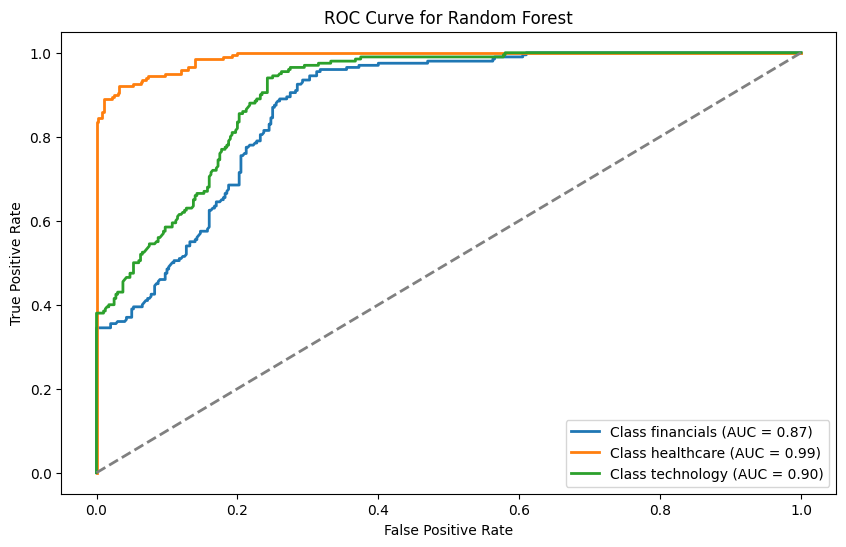

<Figure size 800x600 with 0 Axes>

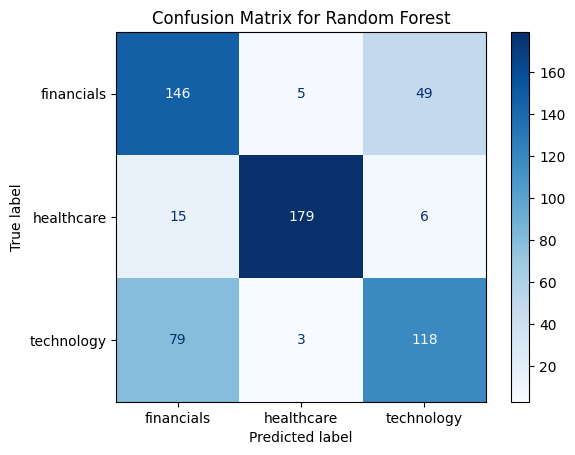

Saved the best model as Random Forest_best_model.joblib

Training CatBoost model...
Training time for CatBoost: 147.09 seconds
Best parameters for CatBoost: {'model__depth': 2, 'model__iterations': 400, 'model__learning_rate': 0.01}
Cross-validation scores for CatBoost: [0.80833333 0.70833333 0.72916667 0.72083333 0.7375     0.72083333
 0.77916667 0.775      0.7125     0.75      ]
Mean cross-validation score: 0.7442

Model: CatBoost
Accuracy: 0.7766666666666666
F1-score: 0.7760549494373515
ROC-AUC: 0.9425833333333333
              precision    recall  f1-score   support

  financials       0.72      0.74      0.73       200
  healthcare       0.87      0.89      0.88       200
  technology       0.73      0.70      0.72       200

    accuracy                           0.78       600
   macro avg       0.78      0.78      0.78       600
weighted avg       0.78      0.78      0.78       600



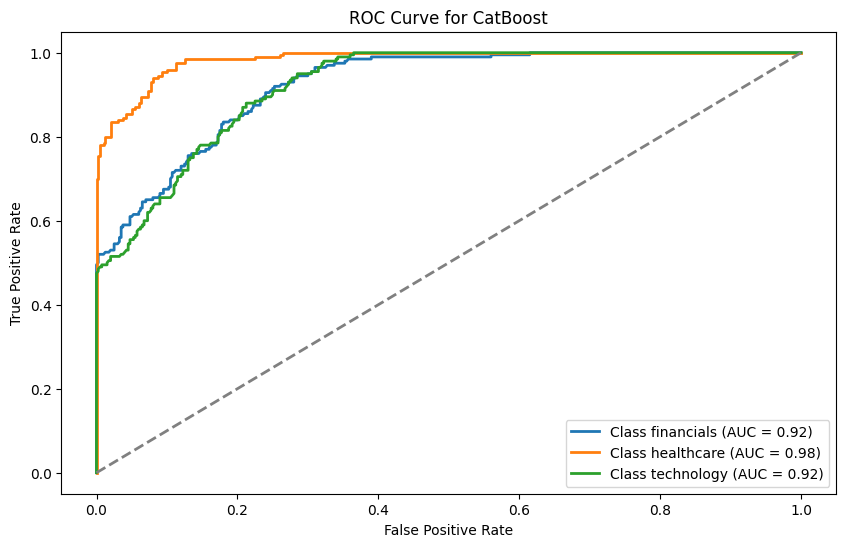

<Figure size 800x600 with 0 Axes>

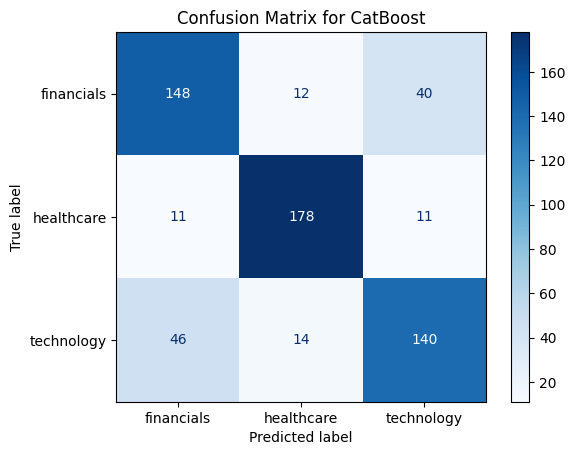

Saved the best model as CatBoost_best_model.joblib


In [ ]:
import pandas as pd
import time
import torch
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from collections import Counter

# GPU var mı kontrol edelim ve uygun cihazı ayarlayalım
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# "sector" ve "symbol" dışındaki tüm sütunlar özellikler
X = data.drop(columns=['sector', 'symbol'])
y = data['sector']  # Hedef değişken (sector)

# SMOTE ile veriyi artırma (her sınıftan 1000 adet veri olacak şekilde)
smote = SMOTE(sampling_strategy={cls: 1000 for cls in y.unique()}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# SMOTE sonrası sınıf dağılımını yazdıralım
print("SMOTE sonrası sınıf dağılımı:", Counter(y_resampled_smote))

# Veriyi eğitim ve test setlerine bölelim (stratify=y ile her sınıfın dağılımını koruyalım)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42, stratify=y_resampled_smote)

# Pipeline adımları için parametreler
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(learning_rate=0.1, iterations=500, depth=5, random_state=42, task_type='GPU', verbose=0)
}

# GridSearch parametreleri
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [2, 5, 10],
    'model__min_samples_split': [10, 15, 20]
}

param_grid_cb = {
    'model__learning_rate': [0.005, 0.01],
    'model__iterations': [200, 300, 400],
    'model__depth': [2,3]
}

# GridSearchCV işlemi
best_models = {}

# ROC eğrisini çizme (çok sınıflı)
def plot_roc_curve(y_test, y_pred_prob, model_name):
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    y_pred_prob_bin = y_pred_prob

    plt.figure(figsize=(10, 6))
    for i in range(len(lb.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob_bin[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Pipeline için adımlar:
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")

    # Eğitim süresi başlatıyoruz
    start_time = time.time()

    # Pipeline tanımlaması
    pipeline = Pipeline(steps=[('model', model)])

    # GridSearchCV tanımlaması
    if model_name == "Random Forest":
        grid_search = GridSearchCV(pipeline, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
    elif model_name == "CatBoost":
        grid_search = GridSearchCV(pipeline, param_grid_cb, cv=3, n_jobs=-1, scoring='accuracy')

    # SMOTE ile GridSearchCV eğitimi
    grid_search.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid_search.best_estimator_

    # Eğitim süresi hesaplama
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_name}: {train_time:.2f} seconds")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # K-Fold Cross Validation (10 katmanlı doğrulama)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    print(f"Cross-validation scores for {model_name}: {cross_val_scores}")
    print(f"Mean cross-validation score: {cross_val_scores.mean():.4f}")

    # Performans metrikleri, Confusion Matrix, ROC Eğrisi ve Classification Report
    y_pred = grid_search.best_estimator_.predict(X_test_smote)
    y_pred_prob = grid_search.best_estimator_.predict_proba(X_test_smote)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test_smote, y_pred)}")
    print(f"F1-score: {f1_score(y_test_smote, y_pred, average='weighted')}")
    print(f"ROC-AUC: {roc_auc_score(y_test_smote, y_pred_prob, multi_class='ovr')}")

    # Sonuçları daha ayrıntılı incelemek için classification report yazdıralım
    print(classification_report(y_test_smote, y_pred))

    # ROC eğrisini çizme
    plot_roc_curve(y_test_smote, y_pred_prob, model_name)

    # Confusion Matrix'i çizme
    cm = confusion_matrix(y_test_smote, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)

    plt.figure(figsize=(8, 6))
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Modeli kaydetme
    model_filename = f"{model_name}_best_model.joblib"
    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Saved the best model as {model_filename}")


**CatBoost ve Random Forest Modeli Sonuçları**

CatBoost modelinin eğitim süresi **147.09** saniye olup, accuracy değeri **%77.67**, F1-score ise **0.78** olarak elde edilmiştir. Healthcare sınıfı yüksek doğruluk gösterirken, financials ve technology sınıflarında daha düşük sonuçlar alınmıştır. ROC-AUC değeri **0.94** ile modelin genel doğruluğu yüksek olmuştur.

Random Forest modelinin eğitim süresi **227.38** saniye olup, accuracy değeri **%73.83**, F1-score ise **0.74** olarak elde edilmiştir. Healthcare sınıfı yine yüksek performans gösterirken, financials ve technology sınıflarında daha düşük sonuçlar alınmıştır. ROC-AUC değeri **0.92** ile modelin genel doğruluğu yüksek olsa da, bazı sınıflarda iyileştirme gereklidir.

Her iki model de başarılı sonuçlar elde etmiştir, ancak CatBoost modelinin genel performansı daha yüksek olmuştur. CatBoost modeli, Random Forest modeline göre daha yüksek doğruluk (accuracy), F1-score ve ROC-AUC değerlerine sahip olup, özellikle healthcare sınıfında çok yüksek bir başarı sergilemiştir.

**Gradient Boosting Modelini Geliştirme Süreci**

Veri Yükleme ve Hazırlık, Veri Eğitim ve Test Verisine Bölme, Hiperparametre Optimizasyonu (GridSearchCV) ve Cross-Validation adımları, Random Forest ve CatBoost modelleri ile aynı şekilde gerçekleştirilmiştir.

Model Seçimi: Bu süreçte, Gradient Boosting sınıflandırma modeli seçilmiştir. Gradient Boosting, zayıf öğrenicilerin ardışık bir şekilde eğitildiği bir ansamble modelidir ve yüksek doğruluk ve genelleme yeteneği ile güçlü sınıflandırma sonuçları sunar. Bu model, özellikle yüksek performans gerektiren sınıflandırma problemlerinde başarılıdır.

Using device: cpu
Training time for Gradient Boosting: 878.09 seconds
Best parameters for Gradient Boosting: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
Cross-validation scores for Gradient Boosting: [0.71428571 0.72571429 0.66857143 0.63428571 0.64       0.69142857
 0.67428571 0.66857143 0.64571429 0.63428571]
Mean cross-validation score: 0.6697

Model: Gradient Boosting
Accuracy: 0.6529680365296804
F1-score: 0.655856979449399
ROC-AUC: 0.9005708242585845
              precision    recall  f1-score   support

  financials       0.52      0.57      0.54       150
  healthcare       0.95      0.91      0.93       139
  technology       0.52      0.50      0.51       149

    accuracy                           0.65       438
   macro avg       0.67      0.66      0.66       438
weighted avg       0.66      0.65      0.66       438



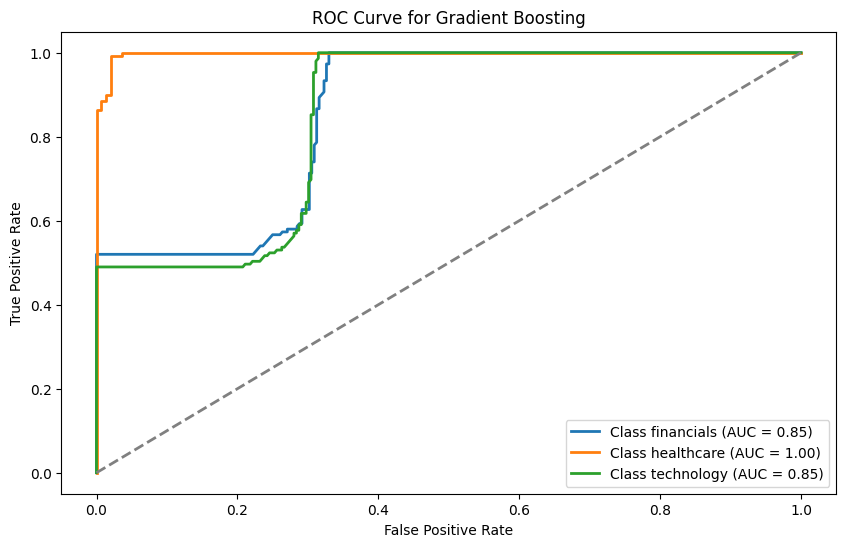

<Figure size 800x600 with 0 Axes>

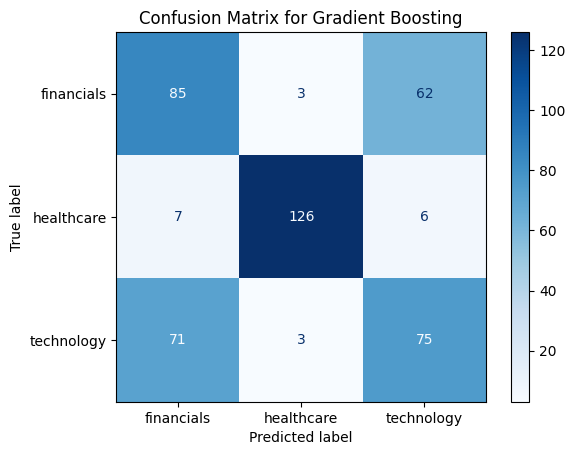

Saved the best model as Gradient_Boosting_best_model.joblib


In [ ]:
import pandas as pd
import time
import torch
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from collections import Counter

# GPU var mı kontrol edelim ve uygun cihazı ayarlayalım
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# "sector" ve "symbol" dışındaki tüm sütunlar özellikler
X = data.drop(columns=['sector', 'symbol'])
y = data['sector']  # Hedef değişken (sector)

# Veriyi eğitim ve test setlerine bölelim (stratify=y ile her sınıfın dağılımını koruyalım)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Gradient Boosting için model
model = GradientBoostingClassifier(random_state=42)

# GridSearch parametreleri (daha basitleştirilmiş)
param_grid_gb = {
    'model__learning_rate': [0.1],
    'model__n_estimators': [100, 200],
    'model__max_depth': [5]
}

# Pipeline tanımlaması
pipeline = Pipeline(steps=[('model', model)])

# Eğitim süresi başlatıyoruz
start_time = time.time()

# GridSearchCV işlemi
best_model = {}

# GridSearchCV tanımlaması
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid_gb, cv=3, n_jobs=-1, scoring='accuracy')

# GridSearchCV ile model eğitimi
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Eğitim süresi hesaplama
end_time = time.time()
train_time = end_time - start_time
print(f"Training time for Gradient Boosting: {train_time:.2f} seconds")
print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")

# K-Fold Cross Validation (10 katmanlı doğrulama)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-validation scores for Gradient Boosting: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean():.4f}")

# Performans metrikleri, Confusion Matrix, ROC Eğrisi ve Classification Report
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_prob = grid_search.best_estimator_.predict_proba(X_test)

print(f"\nModel: Gradient Boosting")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted')}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr')}")

# Sonuçları daha ayrıntılı incelemek için classification report yazdıralım
print(classification_report(y_test, y_pred))

# ROC eğrisini çizme
def plot_roc_curve(y_test, y_pred_prob, model_name):
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    y_pred_prob_bin = y_pred_prob

    plt.figure(figsize=(10, 6))
    for i in range(len(lb.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob_bin[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(y_test, y_pred_prob, "Gradient Boosting")

# Confusion Matrix'i çizme
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)

plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix for Gradient Boosting')
plt.show()

# Modeli kaydetme
model_filename = "Gradient_Boosting_best_model.joblib"
joblib.dump(grid_search.best_estimator_, model_filename)
print(f"Saved the best model as {model_filename}")


**Gradient Boosting Modeli Sonuçları**

Eğitim süresi **878.09** saniye olup, CPU ile gerçekleştirilmiştir. Modelin accuracy değeri **%65.30**, F1-score ise **0.66** olarak elde edilmiştir. Healthcare sınıfı yüksek performans gösterirken, financials ve technology sınıflarında düşük sonuçlar alınmıştır. ROC-AUC değeri **0.90** ile modelin genel doğruluğu yüksek olsa da, bazı sınıflarda iyileştirme gereklidir.

**XGBoost Modelini Geliştirme Süreci**

Veri Yükleme ve Hazırlık, Veri Eğitim ve Test Verisine Bölme adımları, Random Forest ve CatBoost modelleri ile aynı şekilde gerçekleştirilmiştir. Bu adımlar, veri hazırlığı ve model doğrulama sürecinin her iki modelde de tutarlı bir şekilde uygulandığını göstermektedir.

Model Seçimi: Bu süreçte, XGBoost sınıflandırma modeli seçilmiştir. XGBoost, zayıf öğrenicilerin ardışık bir şekilde eğitildiği bir ansamble modelidir ve yüksek doğruluk ve genelleme yeteneği ile güçlü sınıflandırma sonuçları sunar. Bu model, özellikle yüksek performans gerektiren sınıflandırma problemlerinde başarılıdır.

Hiperparametre Optimizasyonu: Kütüphane uyumsuzlukları nedeniyle, GridSearchCV ve Cross-Validation işlemleri yerine manuel hiperparametre optimizasyonu yapılmıştır. Farklı parametre kombinasyonları test edilmiş ve en iyi parametre seti elde edilmiştir. Bu süreçte, modelin hiperparametrelerini manuel olarak ayarlayarak, en iyi sonuçları veren parametreler belirlenmiştir.


Testing parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8}

Testing parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0}

Testing parameters: {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}

Testing parameters: {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.9}

Best Parameters: {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}
Best Accuracy: 0.6917

Model Performance:
Accuracy: 0.6917
F1-score: 0.6917
ROC-AUC: 0.9101

Classification Report:
              precision    recall  f1-score   support

  financials       0.54      0.55      0.54       200
  healthcare       0.99      0.99      0.99       200
  technology       0.55      0.54      0.54       200

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600



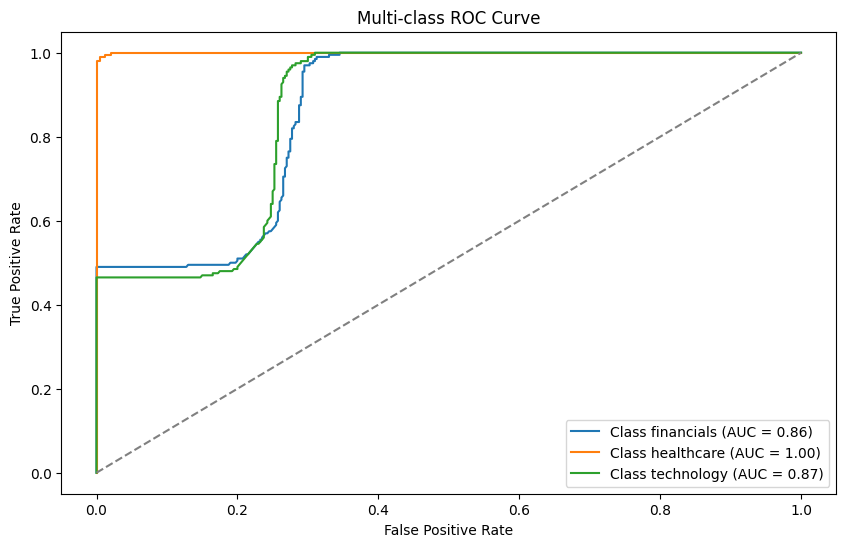

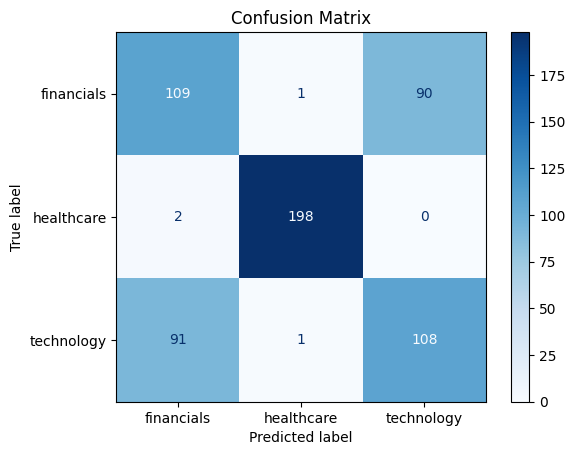


Model successfully saved!


In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib
from imblearn.over_sampling import SMOTE

# Veriyi yükleyelim
file_path = 'merged_dataset.csv'
data = pd.read_csv(file_path)

# "sector" ve "symbol" dışındaki tüm sütunlar özellikler
X = data.drop(columns=['sector', 'symbol'])
y = data['sector']

# Label Encoder ile kategoriik etiketleri sayısala çevirelim
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # Orjinal etiketleri 0,1,2'ye dönüştür

# SMOTE ile veriyi artırma (sayısal etiketlerle)
smote = SMOTE(sampling_strategy={cls: 1000 for cls in np.unique(y_encoded)}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)

# Hiperparametre kombinasyonları
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.8},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 5, 'subsample': 1.0},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4, 'subsample': 0.9},
]

best_accuracy = 0
best_model = None
best_params = {}

# Manuel hiperparametre optimizasyonu
for params in param_combinations:
    print(f"\nTesting parameters: {params}")

    # Modeli oluştur ve eğit
    model = XGBClassifier(
        **params,
        random_state=42,
        eval_metric='mlogloss',
        verbosity=0
    )
    model.fit(X_train, y_train)

    # Tahmin yap ve performansı ölç
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # En iyi modeli güncelle
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model
        best_params = params

# Sonuçları yazdır
print("\n" + "="*50)
print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.4f}")

# En iyi model ile tahmin yap
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)

# Performans metrikleri (orjinal etiketlerle)
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_prob, multi_class='ovr'):.4f}")

# Classification report (orjinal etiket isimleriyle)
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels, target_names=le.classes_))

# ROC Eğrisi (orjinal etiket isimleriyle)
plt.figure(figsize=(10, 6))
for i, cls in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test == i, y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix (orjinal etiket isimleriyle)
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Modeli kaydet
joblib.dump(best_model, "best_xgboost_model.joblib")
print("\nModel successfully saved!")

**XGBoost Model Sonuçları**

En iyi parametreler: *{'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}* ile elde edilmiştir. Accuracy değeri **%69.17**, F1-score ise **0.69** olarak belirlenmiştir. Healthcare sınıfı çok yüksek performans gösterirken, financials ve technology sınıflarında daha düşük doğruluklar alınmıştır. ROC-AUC değeri **0.91** ile modelin genel doğruluğu yüksek olmuştur.

**5. Sonuçlar ve Görselleştirme**

---


Yukarıda her modele ait Confusion Matrix ve ROC Eğrisi yer almaktadır. Bu değerlerin daha okunaklı ve anlaşılır olabilmesi için, accuracy, F1-score, ve ROC-AUC metrikleri grafikte görselleştirilmiştir. Bu, modellerin performansını daha net bir şekilde değerlendirmemizi sağlamaktadır.


Accuracy Tablosu:
            Model  Accuracy
    Random Forest    0.7383
         CatBoost    0.7767
Gradient Boosting    0.6530
          XGBoost    0.6917


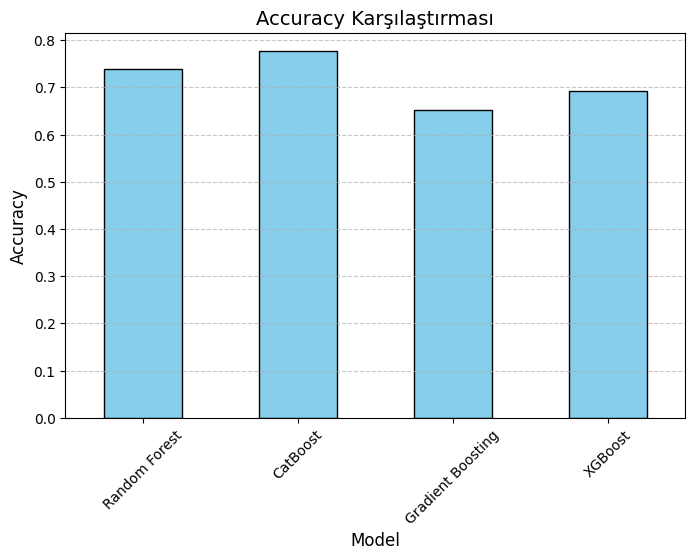


F1-score Tablosu:
            Model  F1-score
    Random Forest    0.7405
         CatBoost    0.7761
Gradient Boosting    0.6559
          XGBoost    0.6917


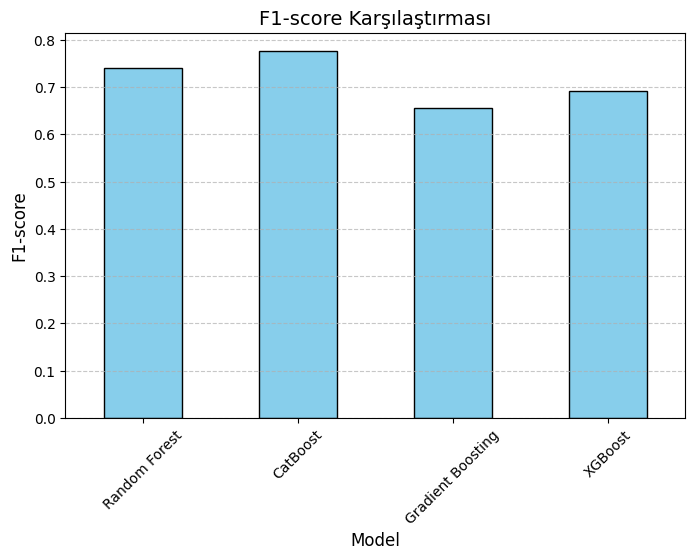


ROC-AUC Tablosu:
            Model  ROC-AUC
    Random Forest   0.9225
         CatBoost   0.9426
Gradient Boosting   0.9006
          XGBoost   0.9101


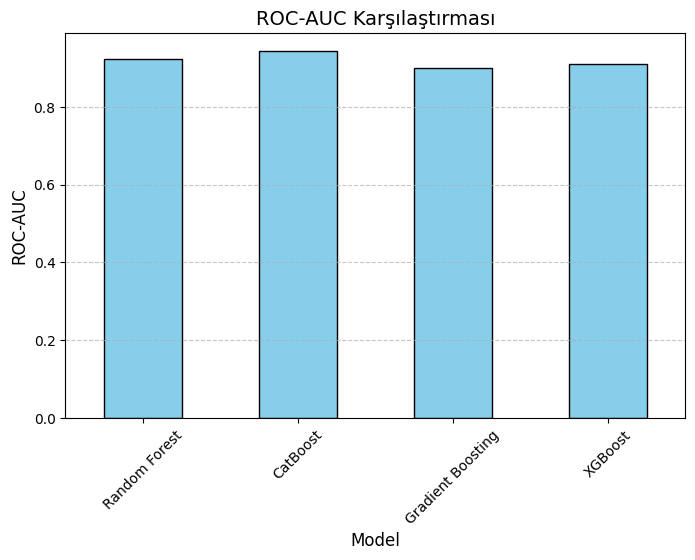

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Model sonuçlarını içeren veri
model_results = {
    "Model": ["Random Forest", "CatBoost", "Gradient Boosting", "XGBoost"],
    "Accuracy": [0.7383, 0.7767, 0.6530, 0.6917],
    "F1-score": [0.7405, 0.7761, 0.6559, 0.6917],
    "ROC-AUC": [0.9225, 0.9426, 0.9006, 0.9101]
}

# DataFrame oluşturma
df = pd.DataFrame(model_results)

# Her metriği ayrı tabloda gösterme
for metric in ["Accuracy", "F1-score", "ROC-AUC"]:
    print(f"\n{metric} Tablosu:")
    print(df[["Model", metric]].to_string(index=False))  # Daha okunaklı hale getirme

    # Bar plot oluşturma
    df.plot(x="Model", y=metric, kind="bar", legend=False, figsize=(8, 5), color='skyblue', edgecolor='black')
    plt.title(f"{metric} Karşılaştırması", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Model performans değerlendirmesine göre **CatBoost**, en yüksek **Accuracy (0.7767)** ve **F1-score (0.7761)** değerleriyle en iyi sonuçları vermektedir. Ayrıca, **ROC-AUC skoru (0.9426)** ile modelin ayrıştırma gücünün de yüksek olduğu görülmektedir.  

**Random Forest**, **Accuracy (0.7383)** ve **F1-score (0.7405)** değerleriyle iyi bir performans göstermiştir ve **ROC-AUC (0.9225)** ile sınıflandırma başarısı yüksektir.  

**XGBoost**, **Accuracy (0.6917)** ve **F1-score (0.6917)** ile orta seviyede bir performans sergilemiştir. **ROC-AUC skoru (0.9101)** de iyi bir seviyededir, ancak CatBoost ve Random Forest kadar güçlü değildir.  

**Gradient Boosting**, en düşük **Accuracy (0.6530)** ve **F1-score (0.6559)** değerlerine sahip olup, diğer modellere kıyasla daha düşük bir performans göstermektedir. Ancak **ROC-AUC skoru (0.9006)** hala kabul edilebilir düzeydedir.  

Sonuç olarak, **CatBoost** genel olarak en iyi performansı sergileyen modeldir, özellikle yüksek doğruluk ve F1-score değerleriyle öne çıkmaktadır.

**7. Tahminleme**

---



**7.1 Ön Hazırlık**

Proje kapsamında, **Real Estate** sektörünün **Finans**, **Sağlık** ve **Teknoloji** sektörlerine olan benzerliğini bulmamız istenmiştir. Bu nedenle, **Real Estate** sektörü için daha önceki adımlarda yer alan **2. Veri Toplama** ve **3. Veri Ön İşleme** adımlarını gerçekleştiriyoruz. Bu süreçte, **Real Estate** sektörü için veri toplanacak, uygun şekilde işlenecek ve ardından benzerlik analizleri yapılacaktır. Bu adımlar, modelin doğru tahminler yapabilmesi için gereklidir.

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Sektör isimlerini çekme fonksiyonu
def fetch_sectors_names():
    url = "https://stockanalysis.com/stocks/industry/sectors/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Endüstri isimlerini çekme fonksiyonu
def fetch_industry_names():
    url = "https://stockanalysis.com/stocks/industry/all/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Belirtilen sektör için hisse senedi listesini çekme fonksiyonu
def fetch_data(sector):
    url = f"https://stockanalysis.com/stocks/sector/{sector}/"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")
        df = pd.read_html(StringIO(str(soup.find("table"))))[0]
        df.drop(columns=['No.'], errors='ignore', inplace=True)  # 'No.' sütunu varsa kaldır
        return df
    else:
        print(f"Error: Failed to fetch data from {url}")
        return None

# Sadece 'Real Estate' sektörünü belirleme
sector = 'real-estate'

# Veri klasörünü oluştur
import os
os.makedirs("data/stock_sectors", exist_ok=True)

# 'Real Estate' sektörü için veri çekme ve CSV'ye kaydetme
df = fetch_data(sector)
if df is not None:
    df.to_csv(f"data/stock_sectors/{sector}.csv", index=False)
    print(f"Data saved for {sector}")
else:
    print(f"Failed to retrieve data for {sector}")


Data saved for real-estate


In [ ]:
import pandas as pd

# Verilerin yüklendiği dosya yolu (sadece Real Estate için)
file_path = '/content/data/stock_sectors/real-estate.csv'

# Veriyi oku
real_estate_df = pd.read_csv(file_path)

# '-' olan hücreleri NaN ile değiştir
real_estate_df.replace("-", pd.NA, inplace=True)

# NaN değerlerin sayısını kontrol et
nan_real_estate = real_estate_df.isna().sum()

# Verilerin önceki bilgilerini yazdır
print("Veri Seti Bilgileri (Önce):")
print("\nReal Estate Sector Verisi (Önce):")
real_estate_df.info()

# NaN içeren satırları sil
real_estate_df_cleaned = real_estate_df.dropna()

# Temizlenmiş verisetini kaydet
real_estate_df_cleaned.to_csv('/content/data/stock_sectors/Real_Estate_cleaned.csv', index=False)

# NaN değerlerin sayısını yazdır
print("\nNaN Değer Sayıları:")
print("\nReal Estate Sector Verisi:")
print(nan_real_estate)

# Verilerin temizlendikten sonraki bilgilerini yazdır
print("\nVeri Seti Bilgileri (Temizlendikten Sonra):")
print("\nReal Estate Sector Verisi (Temizlendikten Sonra):")
real_estate_df_cleaned.info()


Veri Seti Bilgileri (Önce):

Real Estate Sector Verisi (Önce):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Symbol        264 non-null    object
 1   Company Name  264 non-null    object
 2   Market Cap    264 non-null    object
 3   % Change      260 non-null    object
 4   Volume        264 non-null    int64 
 5   Revenue       264 non-null    object
dtypes: int64(1), object(5)
memory usage: 12.5+ KB

NaN Değer Sayıları:

Real Estate Sector Verisi:
Symbol          0
Company Name    0
Market Cap      0
% Change        4
Volume          0
Revenue         0
dtype: int64

Veri Seti Bilgileri (Temizlendikten Sonra):

Real Estate Sector Verisi (Temizlendikten Sonra):
<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, 0 to 263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----

In [ ]:
import yfinance as yf
import pandas as pd

# Veriyi içeren dosyayı yükleyelim
file_path = '/content/data/stock_sectors/Real_Estate_cleaned.csv'  # Dosyanızın yolu burada belirtilmiştir
df = pd.read_csv(file_path)

# Sembol listesi
tickers = df['Symbol'].unique()

# Veriyi çekme (günlük kapanış verileri)
data = yf.download(tickers.tolist(), start='2005-01-01')['Close']

# Aylık veriye dönüştürme (günlük veriyi aylık periyoda indirgeme)
monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme

# Aylık getiri hesaplama
monthly_returns = monthly_data.pct_change()  # Aylık getiri

# Eksik değerleri dolduruyoruz
monthly_returns.fillna(monthly_returns.mean(), inplace=True)

# Yeni veriyi kaydetme
output_path = '/content/data/stock_sectors/Real_Estate_monthly.csv'  # Yeni dosya adı
monthly_returns.to_csv(output_path)

print(f"Yeni verisetiniz {output_path} olarak kaydedildi.")


[*********************100%***********************]  260 of 260 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['LSEAW', 'MRNOW']: YFInvalidPeriodError("%ticker%: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


Yeni verisetiniz /content/data/stock_sectors/Real_Estate_monthly.csv olarak kaydedildi.


<ipython-input-3-b0bd48fa3def>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').ffill()  # Aylık verilere dönüştürme
<ipython-input-3-b0bd48fa3def>:18: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  monthly_returns = monthly_data.pct_change()  # Aylık getiri


In [ ]:
import pandas as pd

# Dosya yolu (Real Estate sektörü için)
file_path = '/content/data/stock_sectors/Real_Estate_monthly.csv'

# İşlem yapılan dosya hakkında bilgi
print(f"\nİşlem Yapılan Dosya: {file_path}")

# CSV dosyasını yükleyin
data = pd.read_csv(file_path)

# Veri hakkında genel bilgi yazdırma
print("\nVeri Bilgisi:")
print(data.info())

# Toplam satır ve sütun sayısını yazdırma
total_rows, total_columns = data.shape
print(f"\nToplam Satır Sayısı: {total_rows}")
print(f"Toplam Sütun Sayısı: {total_columns}")

# Boş değerlerin sayısını kontrol etme
missing_values = data.isnull().sum()

# En çok boş değeri olan sütunları yazdırma
print("\nBoş Değerlerin Sayısı:")
missing_values_sorted = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values_sorted)

# Kaç satırda boş değer olduğunu bulma
rows_with_missing_values = data.isnull().any(axis=1).sum()
columns_with_missing_values = missing_values[missing_values > 0].count()

print(f"\nBoş Değer İçeren Satır Sayısı: {rows_with_missing_values}")
print(f"Boş Değer İçeren Sütun Sayısı: {columns_with_missing_values}")

# Boş sütunları tespit etme ve silme
columns_with_missing_values = data.columns[data.isnull().all()]
print(f"Boş Sütunlar: {columns_with_missing_values.tolist()}")

# Boş sütunları silme
data_cleaned = data.drop(columns=columns_with_missing_values)

# Temizlenmiş veriyi yeniden kaydetme
cleaned_file_path = file_path.replace('.csv', '_cleaned.csv')
data_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Temizlenmiş dosya kaydedildi: {cleaned_file_path}")

# Temizlenmiş CSV dosyasını yükleyin
data_cleaned = pd.read_csv(cleaned_file_path)

# Veri bilgilerini yazdırma
print("\nVeri Bilgisi (Temizlenmiş):")
data_cleaned.info()

# Boş değerlerin sayısını kontrol etme
missing_values_cleaned = data_cleaned.isnull().sum()

# Eğer boş değer varsa, boş değer içeren sütunları yazdırma
missing_columns_cleaned = missing_values_cleaned[missing_values_cleaned > 0]

if not missing_columns_cleaned.empty:
    print("\nBoş Değer İçeren Sütunlar (Temizlenmiş):")
    print(missing_columns_cleaned)
else:
    print("\nBoş Değer İçeren Sütun Yok (Temizlenmiş).")



İşlem Yapılan Dosya: /content/data/stock_sectors/Real_Estate_monthly.csv

Veri Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 261 entries, Date to XIN
dtypes: float64(260), object(1)
memory usage: 493.6+ KB
None

Toplam Satır Sayısı: 242
Toplam Sütun Sayısı: 261

Boş Değerlerin Sayısı:
LSEAW    242
MRNOW    242
dtype: int64

Boş Değer İçeren Satır Sayısı: 242
Boş Değer İçeren Sütun Sayısı: 2
Boş Sütunlar: ['LSEAW', 'MRNOW']
Temizlenmiş dosya kaydedildi: /content/data/stock_sectors/Real_Estate_monthly_cleaned.csv

Veri Bilgisi (Temizlenmiş):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 259 entries, Date to XIN
dtypes: float64(258), object(1)
memory usage: 489.8+ KB

Boş Değer İçeren Sütun Yok (Temizlenmiş).


In [ ]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import EfficientFCParameters  # Daha geniş parametre seti

# Verileri işleme fonksiyonu
def process_data(file_path, sector_name):
    # Veriyi yükle
    data_close = pd.read_csv(file_path)

    # Tarih sütununu datetime formatına çevir
    data_close['Date'] = pd.to_datetime(data_close['Date'])

    # Hisse senedi sembollerini listele
    symbols = [col for col in data_close.columns if col != 'Date']

    # Uzun formata dönüştür (Sadece fiyatlar, SMA ve getiri değerlerini al)
    value_vars = [col for col in data_close.columns if col != 'Date']
    df_long = pd.melt(data_close, id_vars=['Date'], value_vars=value_vars, var_name='symbol', value_name='value')

    # ID sütunu ekleyerek tsfresh için uygun hale getir
    df_long['id'] = df_long['symbol']

    # NaN kontrolü (Boş değer varsa 0 ile doldur)
    df_long['value'] = df_long['value'].fillna(0)

    # TsFresh ile zaman serisi özelliklerini çıkar (daha fazla özellik için EfficientFCParameters kullanıyoruz)
    extracted_features = extract_features(df_long,
                                          column_id='id',
                                          column_sort='Date',
                                          column_value='value',
                                          default_fc_parameters=EfficientFCParameters(),  # Daha fazla özellik
                                          n_jobs=0)

    # Eksik değerleri doldur
    extracted_features_imputed = impute(extracted_features)

    # Sembol isimlerini ekleyelim
    extracted_features_imputed['symbol'] = extracted_features_imputed.index

    # Sector sütunu ekle ve sector_name ile doldur
    extracted_features_imputed['sector'] = sector_name

    # "sector" ve "symbol" sütunlarını en sola taşı
    columns = ['sector', 'symbol'] + [col for col in extracted_features_imputed.columns if col not in ['sector', 'symbol']]
    extracted_features_imputed = extracted_features_imputed[columns]

    # Dosya ismiyle kaydet
    output_file = f'{sector_name}_extracted_features.csv'
    extracted_features_imputed.to_csv(output_file, index=False)

    # Örnek çıktı
    print(f'{sector_name} Data:')
    print(extracted_features_imputed.head())
    print(f'{sector_name} Data Shape: {extracted_features_imputed.shape}')
    return extracted_features_imputed

# Real Estate verisini işleme
real_estate_data = process_data('/content/data/stock_sectors/Real_Estate_monthly_cleaned.csv', 'real_estate')


Feature Extraction: 100%|██████████| 258/258 [00:25<00:00, 10.14it/s]
/usr/local/lib/python3.11/dist-packages/tsfresh/utilities/dataframe_functions.py:198: RuntimeWarning: The columns ['value__query_similarity_count__query_None__threshold_0.0'] did not have any finite values. Filling with zeros.
  warnings.warn(


real_estate Data:
           sector symbol  value__variance_larger_than_standard_deviation  \
AAT   real_estate    AAT                                             0.0   
ABR   real_estate    ABR                                             0.0   
ACR   real_estate    ACR                                             0.0   
ACRE  real_estate   ACRE                                             0.0   
ADC   real_estate    ADC                                             0.0   

      value__has_duplicate_max  value__has_duplicate_min  \
AAT                        0.0                       0.0   
ABR                        0.0                       0.0   
ACR                        0.0                       0.0   
ACRE                       0.0                       0.0   
ADC                        0.0                       0.0   

      value__has_duplicate  value__sum_values  value__abs_energy  \
AAT                    1.0           1.480038           0.984426   
ABR                    1.0  

Veri Toplama ve Veri Ön İşleme adımlarından sonra oluşan veri setini inceleyelim .

In [ ]:
import pandas as pd

# Veriler için info, NaN değerler ve shape yazdıran fonksiyon
def display_data_info(file_path):
    # Veriyi yükle
    data = pd.read_csv(file_path)

    # info() çıktısını yazdır
    print(f"Info for {file_path}:")
    print(data.info())
    print("\n")

    # NaN değerlerin sayısını yazdır
    print(f"NaN values in {file_path}:")
    print(data.isna().sum())
    print("\n")

    # Veri şekli
    print(f"Shape of {file_path}: {data.shape}")
    print("="*50)  # Ayrım için

# Real Estate verisi için info(), NaN değerleri ve shape'lerini yazdıralım
display_data_info('/content/real_estate_extracted_features.csv')


Info for /content/real_estate_extracted_features.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Columns: 779 entries, sector to value__mean_n_absolute_max__number_of_maxima_7
dtypes: float64(777), object(2)
memory usage: 1.5+ MB
None


NaN values in /content/real_estate_extracted_features.csv:
sector                                                      0
symbol                                                      0
value__variance_larger_than_standard_deviation              0
value__has_duplicate_max                                    0
value__has_duplicate_min                                    0
                                                           ..
value__permutation_entropy__dimension_5__tau_1              0
value__permutation_entropy__dimension_6__tau_1              0
value__permutation_entropy__dimension_7__tau_1              0
value__query_similarity_count__query_None__threshold_0.0    0
value__mean_n_absolute_max__number_of_maxima_7         

**7.2 Modeller ile Tahminleme**

Bu adımda, eğitim sürecinde kullanılan **merged_dataset.csv** verisi ile daha önce **Real Estate** sektörü için oluşturduğumuz **real_estate_extracted_features.csv** veri seti kullanılarak tahminleme işlemi yapılacaktır.

**Adımlar**:

1. **Eğitim Verisi**: İlk olarak, eğitim sürecinde kullandığımız **merged_dataset.csv** verisini kullanarak, daha önce eğitilen modelleri (Random Forest, CatBoost vb.) test edeceğiz. Bu, genel modelin performansını kontrol etmek ve **Real Estate** sektörünün diğer sektörlerle karşılaştırmasını yapabilmek için gereklidir.

2. **Real Estate Veri Seti**: Daha sonra, **Real Estate** sektörü için özel olarak oluşturduğumuz **real_estate_extracted_features.csv** veri seti üzerinde tahminleme yapılacaktır. Bu veri seti, **Real Estate** sektörüne ait özellikleri içerir ve diğer sektörlerle karşılaştırma yapmak için kullanılacaktır.

**Tahminleme Süreci**:
- Hem **merged_dataset.csv** hem de **real_estate_extracted_features.csv** veri setleri, eğitim sırasında elde edilen en iyi modellerle tahminleme için kullanılacak.
- Sonuç olarak, **Real Estate** sektörünün **Finans**, **Sağlık** ve **Teknoloji** sektörlerine olan benzerliği analiz edilecek ve karşılaştırma yapılacaktır.

In [9]:
import pandas as pd
import random
from joblib import load
from sklearn.metrics import accuracy_score
import numpy as np

# Verisetini yükleyin
dataset = pd.read_csv('merged_dataset.csv')  # Dosya yolunu buraya ekleyin

# Modelleri yükleyin
models = {
    'Random Forest': load('Random Forest_best_model.joblib'),
    'XGBoost': load('xgboost_best_model.joblib'),
    'CatBoost': load('CatBoost_best_model.joblib'),
    'Gradient Boosting': load('Gradient_Boosting_best_model.joblib')
}

# Her sektörden 5 sembol seçin (SEKTÖRLERE ÖZEL)
sectors = ['financials', 'healthcare', 'technology']
random_symbols = []

# Her sektörden rastgele sembol seçme işlemi
for sector in sectors:
    # Sektör ve sembol kombinasyonlarından benzersizleri al
    sector_data = dataset[dataset['sector'] == sector]
    unique_combinations = sector_data[['sector', 'symbol']].drop_duplicates()

    # Sadece o sektöre ait sembolleri seç
    sector_symbols = unique_combinations['symbol'].tolist()

    # 5 sembol seç (sector_symbols boş olmadığından emin olun)
    if len(sector_symbols) >= 5:
        selected_symbols = random.sample(sector_symbols, 5)
        # Seçilen sembolleri sektör bilgisiyle birlikte kaydet
        random_symbols.extend([(symbol, sector) for symbol in selected_symbols])

# Seçilen semboller için veriyi filtreleyin (SEKTÖR BİLGİSİ KORUNARAK)
selected_data = pd.DataFrame()
for symbol, sector in random_symbols:
    sector_symbol_data = dataset[(dataset['symbol'] == symbol) & (dataset['sector'] == sector)]
    selected_data = pd.concat([selected_data, sector_symbol_data])

# Özellikleri ve hedefi ayırın (SEKTÖR BİLGİSİ KORUNMUŞ HALİYLE)
X_selected = selected_data.drop(columns=['sector', 'symbol'])
y_selected = selected_data['sector']

# Sektör isimleri için eşleme
sector_names = {0: 'financials', 1: 'healthcare', 2: 'technology'}
sector_to_num = {v: k for k, v in sector_names.items()}  # Metin → Sayısal dönüşüm

# Gerçek sektörleri sayısallaştırın
y_selected_numeric = y_selected.map(sector_to_num)

# Sonuçları saklamak için bir sözlük oluşturun
all_predictions = {}

# Her model için tahminleri yapın
for model_name, model in models.items():
    print(f"\nModel: {model_name}")

    # Sektör tahminlerini yapın
    if hasattr(model, "predict_proba"):
        # Eğer model olasılık tahminleri yapabiliyorsa
        predictions_proba = model.predict_proba(X_selected)
        predictions = np.argmax(predictions_proba, axis=1)  # En yüksek olasılığa sahip sınıfı seç
    else:
        # Eğer model sadece sınıf tahmini yapıyorsa
        predictions = model.predict(X_selected)

    # Tahminleri sayısala dönüştür
    if isinstance(predictions[0], str):  # Eğer tahminler string ise
        predictions = np.array([sector_to_num[pred] for pred in predictions])
    elif isinstance(predictions[0], np.ndarray):  # Eğer tahminler ndarray ise
        predictions = predictions.flatten()

    # Tahminleri saklamak için bir sözlük oluşturun
    predicted_sectors = {}

    for i, (symbol, original_sector) in enumerate(random_symbols):
        prediction = predictions[i]
        actual_sector = selected_data[selected_data['symbol'] == symbol]['sector'].values[0]

        # Eğer prediction bir ndarray ise, ilk değeri al
        if isinstance(prediction, np.ndarray):
            prediction = prediction[0]

        predicted_sector = sector_names.get(prediction, prediction)

        predicted_sectors[symbol] = {
            'actual_sector': actual_sector,
            'predicted_sector': predicted_sector,
            'predicted_probabilities': {
                'financials': round(predictions_proba[i][0] * 100, 2) if hasattr(model, "predict_proba") else None,
                'healthcare': round(predictions_proba[i][1] * 100, 2) if hasattr(model, "predict_proba") else None,
                'technology': round(predictions_proba[i][2] * 100, 2) if hasattr(model, "predict_proba") else None
            }
        }

    # Sonuçları yazdırın
    for symbol, result in predicted_sectors.items():
        predicted_probs = result['predicted_probabilities']
        probs_str = " | ".join([f"{sector}: {prob}%" for sector, prob in predicted_probs.items()]) if predicted_probs['financials'] is not None else "N/A"
        print(f"Sembol: {symbol}")
        print(f"  - Gerçek Sektör: {result['actual_sector']}")
        print(f"  - Tahmin Edilen Sektör: {result['predicted_sector']}")
        print(f"  - Tahmin Edilen Sektör Oranları: {probs_str}\n")

    # Doğruluk oranını hesaplayın
    accuracy = accuracy_score(y_selected_numeric, predictions)
    print(f"{model_name} Modelinin doğruluk oranı: {accuracy * 100:.2f}%\n")


Model: Random Forest
Sembol: WULF
  - Gerçek Sektör: financials
  - Tahmin Edilen Sektör: healthcare
  - Tahmin Edilen Sektör Oranları: financials: 33.63% | healthcare: 43.25% | technology: 23.12%

Sembol: ICCH
  - Gerçek Sektör: financials
  - Tahmin Edilen Sektör: financials
  - Tahmin Edilen Sektör Oranları: financials: 64.74% | healthcare: 7.91% | technology: 27.35%

Sembol: LC
  - Gerçek Sektör: financials
  - Tahmin Edilen Sektör: financials
  - Tahmin Edilen Sektör Oranları: financials: 42.34% | healthcare: 26.87% | technology: 30.79%

Sembol: VLY
  - Gerçek Sektör: financials
  - Tahmin Edilen Sektör: financials
  - Tahmin Edilen Sektör Oranları: financials: 48.41% | healthcare: 5.49% | technology: 46.1%

Sembol: PNNT
  - Gerçek Sektör: financials
  - Tahmin Edilen Sektör: financials
  - Tahmin Edilen Sektör Oranları: financials: 59.93% | healthcare: 6.52% | technology: 33.55%

Sembol: XBIO
  - Gerçek Sektör: healthcare
  - Tahmin Edilen Sektör: healthcare
  - Tahmin Edilen Se

Yukarıdaki kod, finans, sağlık ve teknoloji sektörlerinden rastgele 5'er hisse senedi seçerek, farklı makine öğrenmesi modellerinin (Random Forest, XGBoost, CatBoost, Gradient Boosting) bu hisselerin sektörlerini doğru tahmin edip edemediğini değerlendirir. Önce veri seti (merged_dataset.csv) yüklenir ve sektör bazında rastgele hisse senetleri seçilir. Seçilen hisseler için sektör tahminleri yapılır ve gerçek sektörlerle karşılaştırılır. En yüksek olasılığa sahip sektör seçilir. Son olarak, tahmin edilen sektörler yazdırılır ve modellerin doğruluk oranları hesaplanır.

**Real Estate için Tahminleme**

Belirlenen 4 hisse senedi (SUI, DLR, COLD, OLP) için farklı makine öğrenmesi modellerinin sektör tahminlerini analiz eder. Önce veri seti (real_estate_extracted_features.csv) yüklenir ve sadece ilgili hisseler filtrelenir. Ardından, Random Forest, XGBoost, CatBoost ve Gradient Boosting modelleri yüklenir ve seçilen hisselerin sektör tahminleri yapılır. Her hisse için finans, sağlık ve teknoloji sektörlerine ait olasılık yüzdeleri hesaplanır ve en yüksek olasılığa sahip sektör belirlenir.

In [12]:
import pandas as pd
from joblib import load
import numpy as np

# Verisetini yükleyin
dataset = pd.read_csv('/content/real_estate_extracted_features.csv')

# Modelleri yükleyin
models = {
    'Random Forest': load('Random Forest_best_model.joblib'),
    'XGBoost': load('xgboost_best_model.joblib'),
    'CatBoost': load('CatBoost_best_model.joblib'),
    'Gradient Boosting': load('Gradient_Boosting_best_model.joblib')
}

# Analiz edilecek sabit sembol listesi
selected_symbols = ['SUI', 'DLR', 'COLD', 'OLP']

# Sadece belirlenen sembolleri filtrele
selected_data = dataset[dataset['symbol'].isin(selected_symbols)]

# Özellikleri ayırın
X_selected = selected_data.drop(columns=['sector', 'symbol'])

# Tahmin edilecek sektörler
target_sectors = ['financials', 'healthcare', 'technology']

# Her model için analiz yapın
for model_name, model in models.items():
    print(f"\n{'-'*30}")
    print(f"Model: {model_name}")
    print(f"{'-'*30}")

    try:
        # Olasılık tahminlerini al
        proba = model.predict_proba(X_selected)
    except AttributeError:
        print(f"{model_name} modeli olasılık tahmini yapamıyor, atlanıyor...")
        continue

    # Her sembol için sonuçları yazdır
    for i, symbol in enumerate(selected_data['symbol']):
        actual_sector = selected_data.iloc[i]['sector']

        # Benzerlik yüzdelerini formatla
        similarities = {
            'financials': f"{proba[i][0]*100:.2f}%",
            'healthcare': f"{proba[i][1]*100:.2f}%",
            'technology': f"{proba[i][2]*100:.2f}%"
        }

        # En yüksek benzerlik
        max_sector = target_sectors[np.argmax(proba[i])]

        print(f"\nSembol: {symbol}")
        print(f"Gerçek Sektör: {actual_sector}")
        print(f"En Yüksek Benzerlik: {max_sector}")
        print("Detaylı Benzerlik Oranları:")
        print(f"- Financials: {similarities['financials']}")
        print(f"- Healthcare: {similarities['healthcare']}")
        print(f"- Technology: {similarities['technology']}")
        print(f"\n{'='*30}")

print("\nAnaliz tamamlandı!")


------------------------------
Model: Random Forest
------------------------------

Sembol: COLD
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 38.81%
- Healthcare: 32.35%
- Technology: 28.83%


Sembol: DLR
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 35.42%
- Healthcare: 31.05%
- Technology: 33.54%


Sembol: OLP
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 42.04%
- Healthcare: 17.99%
- Technology: 39.97%


Sembol: SUI
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 41.99%
- Healthcare: 16.14%
- Technology: 41.87%


------------------------------
Model: XGBoost
------------------------------

Sembol: COLD
Gerçek Sektör: real_estate
En Yüksek Benzerlik: healthcare
Detaylı Benzerlik Oranları:
- Financials: 27.27%
- Healthcare: 50.32%
- Technology: 22.41%


Sembol: DLR
Ger

Bu kodda, belirlenen hisse senedi yerine, veri setindeki tüm hisseler arasından rastgele 5 hisse seçilir. Seçilen hisseler için sektör tahmini yapılır ve her modelin olasılık değerleri hesaplanarak, en yüksek olasılığa sahip sektör belirlenir. Tahmin edilen ve gerçek sektör bilgileri ekrana yazdırılır.

In [13]:
import pandas as pd
from joblib import load
import numpy as np

# Verisetini yükleyin
dataset = pd.read_csv('/content/real_estate_extracted_features.csv')

# Modelleri yükleyin
models = {
    'Random Forest': load('Random Forest_best_model.joblib'),
    'XGBoost': load('xgboost_best_model.joblib'),
    'CatBoost': load('CatBoost_best_model.joblib'),
    'Gradient Boosting': load('Gradient_Boosting_best_model.joblib')
}

# Rastgele 5 hisse sembolü seç
selected_symbols = dataset['symbol'].drop_duplicates().sample(n=5, random_state=42).tolist()

# Sadece seçilen sembolleri filtrele
selected_data = dataset[dataset['symbol'].isin(selected_symbols)]

# Özellikleri ayırın
X_selected = selected_data.drop(columns=['sector', 'symbol'])

# Tahmin edilecek sektörler
target_sectors = ['financials', 'healthcare', 'technology']

# Her model için analiz yapın
for model_name, model in models.items():
    print(f"\n{'-'*30}")
    print(f"Model: {model_name}")
    print(f"{'-'*30}")

    try:
        # Olasılık tahminlerini al
        proba = model.predict_proba(X_selected)
    except AttributeError:
        print(f"{model_name} modeli olasılık tahmini yapamıyor, atlanıyor...")
        continue

    # Her sembol için sonuçları yazdır
    for i, symbol in enumerate(selected_data['symbol']):
        actual_sector = selected_data.iloc[i]['sector']

        # Benzerlik yüzdelerini formatla
        similarities = {
            'financials': f"{proba[i][0]*100:.2f}%",
            'healthcare': f"{proba[i][1]*100:.2f}%",
            'technology': f"{proba[i][2]*100:.2f}%"
        }

        # En yüksek benzerlik
        max_sector = target_sectors[np.argmax(proba[i])]

        print(f"\nSembol: {symbol}")
        print(f"Gerçek Sektör: {actual_sector}")
        print(f"En Yüksek Benzerlik: {max_sector}")
        print("Detaylı Benzerlik Oranları:")
        print(f"- Financials: {similarities['financials']}")
        print(f"- Healthcare: {similarities['healthcare']}")
        print(f"- Technology: {similarities['technology']}")
        print(f"\n{'='*30}")

print("\nAnaliz tamamlandı!")



------------------------------
Model: Random Forest
------------------------------

Sembol: AHR
Gerçek Sektör: real_estate
En Yüksek Benzerlik: healthcare
Detaylı Benzerlik Oranları:
- Financials: 35.41%
- Healthcare: 39.72%
- Technology: 24.87%


Sembol: CHCT
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 37.53%
- Healthcare: 35.43%
- Technology: 27.03%


Sembol: DEI
Gerçek Sektör: real_estate
En Yüksek Benzerlik: financials
Detaylı Benzerlik Oranları:
- Financials: 44.14%
- Healthcare: 20.44%
- Technology: 35.41%


Sembol: DX
Gerçek Sektör: real_estate
En Yüksek Benzerlik: technology
Detaylı Benzerlik Oranları:
- Financials: 41.94%
- Healthcare: 11.94%
- Technology: 46.13%


Sembol: LINE
Gerçek Sektör: real_estate
En Yüksek Benzerlik: healthcare
Detaylı Benzerlik Oranları:
- Financials: 23.62%
- Healthcare: 57.67%
- Technology: 18.71%


------------------------------
Model: XGBoost
------------------------------

Sembol: AHR
Gerç

**8. Ek**

---


**PCA Uygulanarak Küçültülmüş Verisetleri ile Eğitilen Modeller**

Veriye **PCA** (Principal Component Analysis) uygulanarak boyut indirgeme yapılmış ve elde edilen küçültülmüş veri seti ile eğitim gerçekleştirilmiştir. Aşağıda her iki modelin (Random Forest ve CatBoost) performansı verilmiştir:

- **Random Forest**:
  - **Accuracy**: 0.43
  - **F1-score**: 0.39
  - **ROC-AUC**: 0.67

- **CatBoost**:
  - **Accuracy**: 0.47
  - **F1-score**: 0.44
  - **ROC-AUC**: 0.74

Her sınıf için veri sayısı **2500**'e çıkarılmasına rağmen, bu adım sonucunda model performansında anlamlı bir iyileşme sağlanamamıştır.

Using device: cuda
SMOTE sonrası sınıf dağılımı: Counter({0: 2500, 1: 2500, 2: 2500})

Training Random Forest model...
Training time for Random Forest: 9.35 seconds
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_split': 10, 'model__n_estimators': 200}
Cross-validation scores for Random Forest: [0.44333333 0.435      0.44333333 0.47666667 0.49833333 0.445
 0.46166667 0.45166667 0.425      0.44833333]
Mean cross-validation score: 0.4528

Model: Random Forest
Accuracy: 0.4266666666666667
F1-score: 0.3898755979479814
ROC-AUC: 0.6710333333333334
              precision    recall  f1-score   support

           0       0.36      0.62      0.45       500
           1       0.61      0.58      0.60       500
           2       0.24      0.08      0.12       500

    accuracy                           0.43      1500
   macro avg       0.40      0.43      0.39      1500
weighted avg       0.40      0.43      0.39      1500



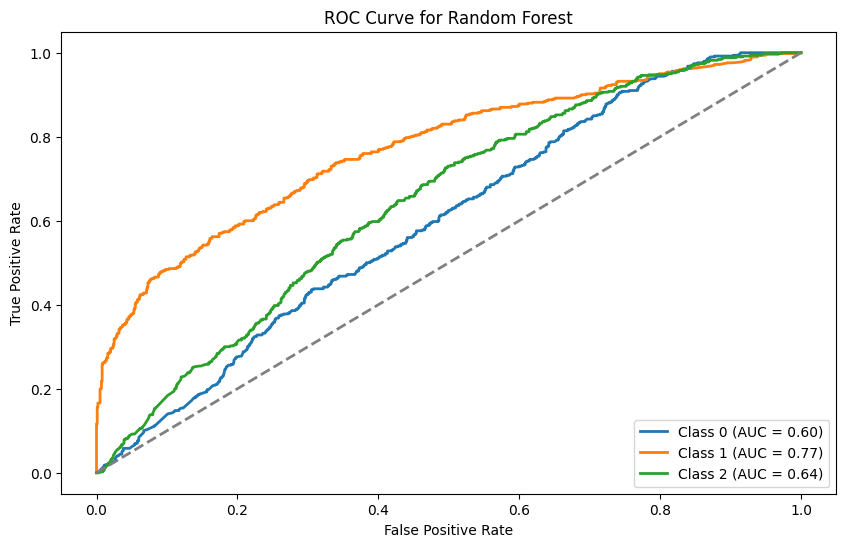

<Figure size 800x600 with 0 Axes>

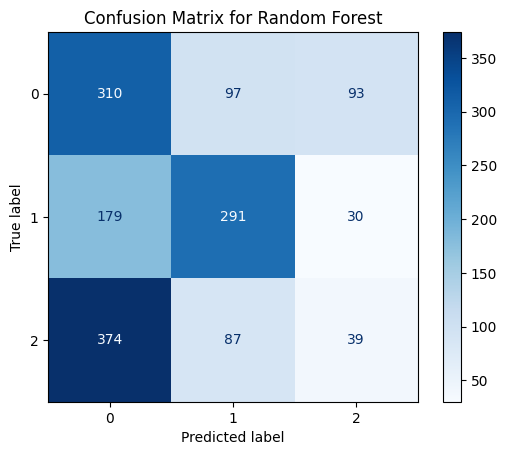

Saved the best model as Random Forest_2best_model.joblib

Training CatBoost model...
Training time for CatBoost: 33.65 seconds
Best parameters for CatBoost: {'model__depth': 4, 'model__iterations': 500, 'model__learning_rate': 0.01}
Cross-validation scores for CatBoost: [0.46833333 0.47333333 0.49       0.495      0.475      0.47833333
 0.47333333 0.47666667 0.465      0.47333333]
Mean cross-validation score: 0.4768

Model: CatBoost
Accuracy: 0.468
F1-score: 0.4423190393169488
ROC-AUC: 0.7449853333333333
              precision    recall  f1-score   support

           0       0.37      0.44      0.40       500
           1       0.65      0.80      0.72       500
           2       0.28      0.16      0.21       500

    accuracy                           0.47      1500
   macro avg       0.43      0.47      0.44      1500
weighted avg       0.43      0.47      0.44      1500



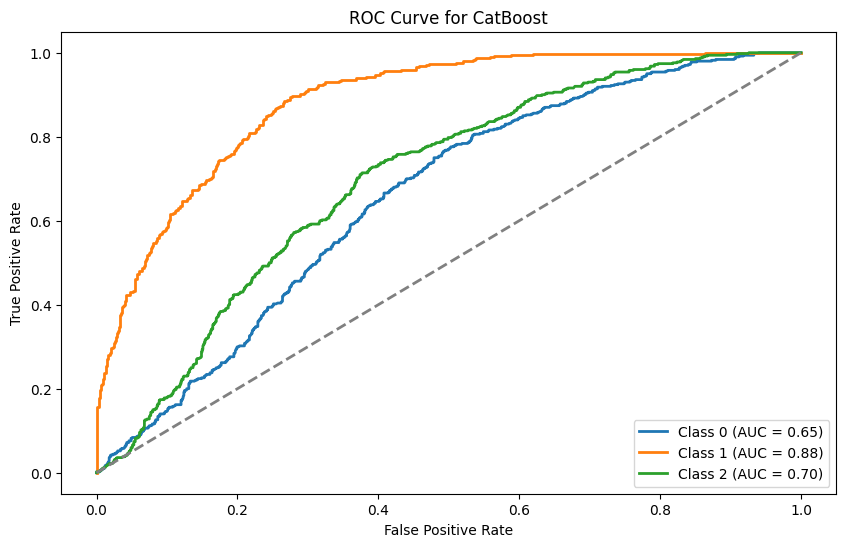

<Figure size 800x600 with 0 Axes>

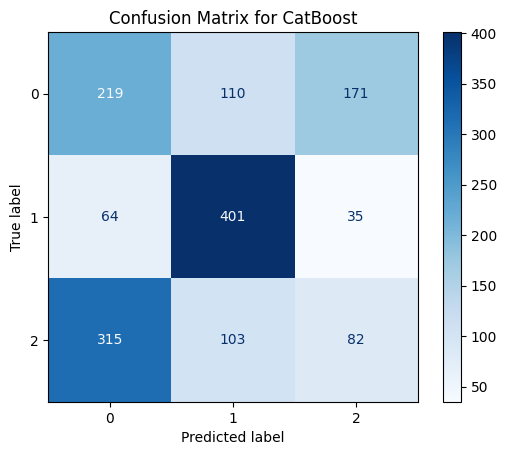

Saved the best model as CatBoost_2best_model.joblib


In [ ]:
import pandas as pd
import time
import torch
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from collections import Counter

# GPU var mı kontrol edelim ve uygun cihazı ayarlayalım
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Veriyi yükleyelim
file_path = '/content/processed_dataset_std.csv'
data = pd.read_csv(file_path)

# "sector" ve "symbol" dışındaki tüm sütunlar özellikler
X = data.drop(columns=['sector', 'symbol'])
y = data['sector']  # Hedef değişken (sector)

# SMOTE ile veriyi artırma (her sınıftan 1000 adet veri olacak şekilde)
smote = SMOTE(sampling_strategy={cls: 2500 for cls in y.unique()}, random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X, y)

# SMOTE sonrası sınıf dağılımını yazdıralım
print("SMOTE sonrası sınıf dağılımı:", Counter(y_resampled_smote))

# Veriyi eğitim ve test setlerine bölelim (stratify=y ile her sınıfın dağılımını koruyalım)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled_smote, y_resampled_smote, test_size=0.2, random_state=42, stratify=y_resampled_smote)

# Pipeline adımları için parametreler
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(learning_rate=0.1, iterations=500, depth=5, random_state=42, task_type='GPU', verbose=0)
}

# GridSearch parametreleri
param_grid_rf = {
    'model__n_estimators': [200],
    'model__max_depth': [5],
    'model__min_samples_split': [10]
}

param_grid_cb = {
    'model__learning_rate': [0.01],
    'model__iterations': [300, 500],
    'model__depth': [4]
}

# GridSearchCV işlemi
best_models = {}

# ROC eğrisini çizme (çok sınıflı)
def plot_roc_curve(y_test, y_pred_prob, model_name):
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)
    y_pred_prob_bin = y_pred_prob

    plt.figure(figsize=(10, 6))
    for i in range(len(lb.classes_)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob_bin[:, i])
        roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob_bin[:, i])
        plt.plot(fpr, tpr, lw=2, label=f'Class {lb.classes_[i]} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Pipeline için adımlar:
for model_name, model in models.items():
    print(f"\nTraining {model_name} model...")

    # Eğitim süresi başlatıyoruz
    start_time = time.time()

    # Pipeline tanımlaması
    pipeline = Pipeline(steps=[('model', model)])

    # GridSearchCV tanımlaması
    if model_name == "Random Forest":
        grid_search = GridSearchCV(pipeline, param_grid_rf, cv=3, n_jobs=-1, scoring='accuracy')
    elif model_name == "CatBoost":
        grid_search = GridSearchCV(pipeline, param_grid_cb, cv=3, n_jobs=-1, scoring='accuracy')

    # SMOTE ile GridSearchCV eğitimi
    grid_search.fit(X_train_smote, y_train_smote)
    best_models[model_name] = grid_search.best_estimator_

    # Eğitim süresi hesaplama
    end_time = time.time()
    train_time = end_time - start_time
    print(f"Training time for {model_name}: {train_time:.2f} seconds")
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

    # K-Fold Cross Validation (10 katmanlı doğrulama)
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    cross_val_scores = cross_val_score(grid_search.best_estimator_, X_train_smote, y_train_smote, cv=cv, scoring='accuracy')
    print(f"Cross-validation scores for {model_name}: {cross_val_scores}")
    print(f"Mean cross-validation score: {cross_val_scores.mean():.4f}")

    # Performans metrikleri, Confusion Matrix, ROC Eğrisi ve Classification Report
    y_pred = grid_search.best_estimator_.predict(X_test_smote)
    y_pred_prob = grid_search.best_estimator_.predict_proba(X_test_smote)

    print(f"\nModel: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test_smote, y_pred)}")
    print(f"F1-score: {f1_score(y_test_smote, y_pred, average='weighted')}")
    print(f"ROC-AUC: {roc_auc_score(y_test_smote, y_pred_prob, multi_class='ovr')}")

    # Sonuçları daha ayrıntılı incelemek için classification report yazdıralım
    print(classification_report(y_test_smote, y_pred))

    # ROC eğrisini çizme
    plot_roc_curve(y_test_smote, y_pred_prob, model_name)

    # Confusion Matrix'i çizme
    cm = confusion_matrix(y_test_smote, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)

    plt.figure(figsize=(8, 6))
    cm_display.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

    # Modeli kaydetme
    model_filename = f"{model_name}_2best_model.joblib"
    joblib.dump(grid_search.best_estimator_, model_filename)
    print(f"Saved the best model as {model_filename}")


Çalışmamı incelediğiniz için teşekkür ederim.

Elif Yılmaz